# Quantum-computing

The **objective** of this module is to introduce students to the fundamental principles of quantum computing. The module covers the core concepts of qubits and quantum states, with emphasis on the phenomena of quantum superposition, entanglement, decoherence, and quantum measurement, and their implications for information processing. The foundational postulates of quantum mechanics underlying quantum computing are analyzed to provide a rigorous theoretical framework for these concepts. Students will explore quantum gates and quantum circuits as the building blocks of quantum algorithms. Practical implementation of these concepts will be demonstrated using a Python-based quantum computing library, enabling hands-on experience in designing and simulating quantum circuits. Real-world applications of quantum computing will be illustrated through example exercises, including quantum cryptography, to highlight the advantages and challenges of quantum approaches to secure communication.

## 1. Introduction

**Quantum computing** is an interdisciplinary field that integrates *computer science*, *physics*, and *mathematics* to solve certain classes of complex problems more efficiently than classical computers by exploiting the principles of **quantum mechanics**. Potential applications include machine learning, optimization, the simulation of physical and chemical systems, as well as advancements in finance, medicine, and other domains where problems remain intractable for even the most powerful classical supercomputers.

---

The origins of quantum computing can be traced back to the early 20th century, rooted in the development of quantum mechanics and evolving through successive stages of theoretical and experimental progress. Its [history](https://quantumpedia.uk/a-brief-history-of-quantum-computing-e0bbd05893d0) can be divided into four distinct periods: 

- Foundation Period (1900–1980) – This era laid the essential physical groundwork for quantum computing. Max Planck’s quantization of energy (1900), Einstein’s explanation of the photoelectric effect (1905), and the development of quantum mechanics by Heisenberg, Schrödinger, and others established the principles of superposition and entanglement that would later make quantum computation possible.

- Theoretical Period (1980–2000) – Quantum computing emerged as a concept, with Paul Benioff’s quantum mechanical model of computation, Richard Feynman’s proposal to simulate quantum systems, and David Deutsch’s universal quantum computer model. Key algorithms, including Shor’s factoring algorithm (1994) and Grover’s search algorithm (1996), laid the foundation for the potential power of quantum computers.

- Experimental / Realization Period (2000–2021) – Researchers began building physical quantum systems. Early multi-qubit devices, D-Wave’s quantum annealers, IBM’s 5-qubit cloud-accessible computers, and Google’s 53-qubit Sycamore chip marked significant milestones. In 2019, Google claimed quantum supremacy, demonstrating a quantum computation beyond classical capability.

- Advancement Period (2021–present) – The current era focuses on scalability, error correction, and practical applications. Large-scale qubit processors, improved fidelities, fault-tolerant architectures, and cloud-based quantum computing platforms illustrate the rapid industrial and research investment in the field.

## 2. Foundations of Quantum Computing

### 2.1. The Postulates of Quantum Mechanics

**Quantum computing** builds on the fundamental principles of **quantum mechanics** [1], which define how information can be represented, manipulated, and measured in **quantum systems**. Together, these **postulates** form the foundation of all quantum computing models.

<u>Postulate 1</u> (State Space): Associated with any isolated quantum system is a complex vector space with an inner product (a Hilbert space), called the state space of the system. The system is completely described by its state vector $|\psi \rangle $, which is a unit vector in this space.

*In quantum computing*:
- Represents qubits and their superpositions.
- Describes initialization of quantum registers.


<u>Postulate 2 </u> (Time Evolution): The evolution of a closed quantum system from time $t_0$ to $t_1$ is described by the unitary transformation:
$$
    |\psi(t_1)\rangle = U |\psi(t_0)\rangle, \quad U^\dagger U = I
$$

*In quantum computing*:
- Quantum gates correspond to unitary operators.
- The state $|\psi \rangle $ changes via quantum gates.
- All quantum algorithms are sequences of unitary operations (quantum circuits).
- Ensures reversibility of quantum computation.

<u>Postulate 3</u> (Measurement): Quantum measurements are described by a collection of **measurement operators** $\{ M_m \}$, acting on the state space of the system. Each operator corresponds to a possible measurement outcome $m$.

If the system is in the state $|\psi \rangle $ immediately before the measurement, the probability of obtaining outcome $m$ is
$$
p(m) = \langle \psi | M_m^\dagger M_m | \psi \rangle.
$$


The state of the system after measurement becomes

$$
    | \psi \rangle \xrightarrow{\text{Measurement}}  \frac{M_m |\psi \rangle}{\sqrt{{\langle\psi|} M_m^\dagger M_m |\psi \rangle}}.
$$

The measurement operators satisfy the completeness relation

$$
\sum_m M_m^\dagger M_m = I,
$$

which ensures that the probabilities of all possible outcomes sum to one:

$$
 \sum_m p(m) = \sum_m \langle \psi | M_m^\dagger M_m | \psi \rangle = 1 .
$$ 

*In quantum computing*:

- Explains probabilistic outcomes and collapse of superpositions.
- Converts qubit superpositions into classical bits for readout.
- Determines the output of quantum algorithms.
- Implements projective measurements in quantum circuits.


<u>Postulate 4</u> (Composition):
The state space of a composite physical system is the tensor product of the state spaces of its subsystems. If subsystem $i$ is prepared in the state $|\psi_i\rangle $, the joint state of the total system is $ |\psi_1\rangle \otimes | \psi_2 \rangle \otimes ... \otimes  |\psi_n\rangle$

*In quantum computing*:

- Describes multi-qubit systems and entanglement.
- Allows operations on subsystems or individual qubits.
- Fundamental for quantum circuits, quantum teleportation, and entanglement-based algorithms.

### 2.2. Qubits and superposition

Like classical bits, qubits (quantum bits) are the basic units of quantum information. 
A classical bit can exist in exactly one of two states, 0 or 1. In contrast, a qubit can exist in a superposition of these states. 

The computational basis states of a qubit are denoted
$$
|0 \rangle \equiv \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad 
|1 \rangle \equiv \begin{bmatrix} 0 \\ 1 \end{bmatrix},
$$
which form an orthonormal basis of a two-dimensional complex Hilbert space.

According to the vector-space framework of quantum mechanics, the state of a qubit can be expressed as a linear combination of the computational basis states:
$$
|\psi \rangle = \alpha |0 \rangle + \beta |1 \rangle  \equiv 
\begin{bmatrix} \alpha \\ \beta \end{bmatrix}, \tag{1}
$$

where $\alpha, \beta \in \mathbb{C}$ are probability amplitudes, satisfying the normalization condition
$$
    |\alpha|^2 + |\beta|^2 = 1.
$$

Equation (1) illustrates the principle of superposition: any linear combination of valid quantum states is itself a valid quantum state, allowing a qubit to exist in infinitely many states beyond the classical 0 and 1.

A pure state of a single qubit can be visualized geometrically as a point on the Bloch sphere:

$$ |\psi \rangle = \cos \frac{\theta}{2} |0 \rangle + e^{i \phi} \sin \frac{\theta}{2} |1 \rangle , \tag{2} $$

$$
\alpha = \cos \frac{\theta}{2}, \quad \beta = e^{i \phi} \sin \frac{\theta}{2},
$$

where the amplitudes are parameterized by the polar and azimuthal angles $\theta, \phi \in \mathbb{R}$. For a single qubit, the global phase factor has no physically observable effect and can be omitted. After removing the global phase, $\alpha$ can be taken as real.


<div style="text-align: center;">
<img src="Figures_QC/Bloch sphere.png" alt="Bloch sphere" width="20%"  />

Fig.2. Bloch sphere: geometrical representation of the state vector of a single qubit system in spherical coordinates. 
</div>

A qubit state can be expressed in different but equivalent ways: Dirac notation is convenient for theoretical analysis and quantum algorithms, the column-vector form is useful for computations and simulations, and the Bloch sphere provides a geometric visualization that helps build intuition.

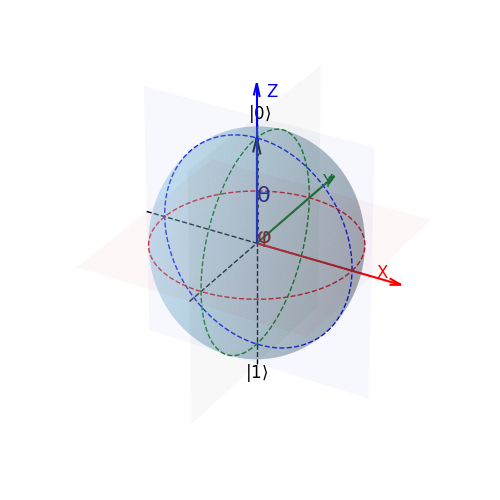

In [1]:
import numpy as np
from ipywidgets import VBox, HBox, FloatSlider, HTML, interactive_output
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib widget
import ipympl


# -------------------------------
# Figure setup
# -------------------------------
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])
ax.grid(False)
ax.set_axis_off()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig.canvas.header_visible = False
fig.canvas.footer_visible = False


# -------------------------------
# Draw Bloch sphere
# -------------------------------
# Transparent but smooth Bloch sphere
u, v = np.mgrid[0:2*np.pi:120j, 0:np.pi:60j]  # denser mesh for smoothness
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)

# Transparent surface with subtle shading
ax.plot_surface(xs, ys, zs, color='skyblue', alpha=0.25, rstride=1, cstride=1, shade=True)


# Planes y=0 and z=0
px = np.linspace(-1.2,1.2,50)
pz = np.linspace(-1.2,1.2,50)
PX, PZ = np.meshgrid(px, pz)
ax.plot_surface(PX, 0*PX, PZ, color='blue', alpha=0.03)

px2 = np.linspace(-1.2,1.2,50)
py2 = np.linspace(-1.2,1.2,50)
PX2, PY2 = np.meshgrid(px2, py2)
ax.plot_surface(PX2, PY2, 0*PX2, color='red', alpha=0.03)

# Plane x=0 (YZ plane)
py = np.linspace(-1.2, 1.2, 50)
pz = np.linspace(-1.2, 1.2, 50)
PY, PZ = np.meshgrid(py, pz)
ax.plot_surface(0*PY, PY, PZ, color='green', alpha=0.03)  # green translucent plane

# Axes
ax.quiver(0,0,0,1.5,0,0,color='r', arrow_length_ratio=0.08)
ax.quiver(0,0,0,0,1.5,0,color='g', arrow_length_ratio=0.08)
ax.quiver(0,0,0,0,0,1.5,color='b', arrow_length_ratio=0.08)
ax.text(1.25,0,0,'X', color='r', fontsize=12)
ax.text(0,1.25,0,'Y', color='g', fontsize=12)
ax.text(0.1,0,1.4,'Z', color='b', fontsize=12)

# -----------------------------------------
# Quantum state labels that rotate in 3D
# -----------------------------------------

# |0> at north pole
ax.text(0, 0.05, 1.2, r"$|0\rangle$", color="k", fontsize=12,
        horizontalalignment='center', verticalalignment='center')

# |1> at south pole
ax.text(0, 0, -1.3, r"$|1\rangle$", color="k", fontsize=12,
        horizontalalignment='center', verticalalignment='center')

# -------------------------------
# Initial angles
# -------------------------------
theta0_deg = 0
phi0_deg   = 0
theta0 = np.deg2rad(theta0_deg)
phi0   = np.deg2rad(phi0_deg)

x = np.sin(theta0)*np.cos(phi0)
y = np.sin(theta0)*np.sin(phi0)
z = np.cos(theta0)

# Store artists
artists = {}
artists['bloch_vec'] = ax.quiver(0,0,0,x,y,z,color='k', arrow_length_ratio=0.15)
artists['phi_arc'], = ax.plot([], [], [], 'r', lw=2)
artists['theta_arc'], = ax.plot([], [], [], 'b', lw=2)

artists['phi_label'] = ax.text(0,0,0,'', color='darkred', fontsize=12)
artists['theta_label'] = ax.text(0,0,0,'', color='darkblue', fontsize=12)

artists['proj_xy'], = ax.plot([], [], [], 'k:', lw=2)   # dotted XY-plane projection
artists['proj_z'],  = ax.plot([], [], [], 'k:', lw=2)  # Z-axis projection
artists['origin_to_xy'], = ax.plot([], [], [], 'k:', lw=1.5)



line_pts = np.linspace(-1.2, 1.2, 100)

# Intersection of XY plane (z=0) and XZ plane (y=0) → x-axis
ax.plot(line_pts, 0*line_pts, 0*line_pts, 'k--', lw=1)

# Optional: intersection of XY and YZ planes → y-axis
ax.plot(0*line_pts, line_pts, 0*line_pts, 'k--', lw=1)

# Optional: intersection of XZ and YZ planes → z-axis
ax.plot(0*line_pts, 0*line_pts, line_pts, 'k--', lw=1)

# -------------------------------
# Intersection of planes with the sphere (dotted)
# -------------------------------
phi_vals = np.linspace(0, 2*np.pi, 200)

# Intersection with y=0 plane (XZ plane)
x_y0 = np.cos(phi_vals)
y_y0 = np.zeros_like(phi_vals)
z_y0 = np.sin(phi_vals)
ax.plot(x_y0, y_y0, z_y0, 'b--', lw=1)

# Intersection with z=0 plane (XY plane)
x_z0 = np.cos(phi_vals)
y_z0 = np.sin(phi_vals)
z_z0 = np.zeros_like(phi_vals)
ax.plot(x_z0, y_z0, z_z0, 'r--', lw=1)

# Intersection with x=0 plane (YZ plane) → cyan dotted
x_x0 = np.zeros_like(phi_vals)
y_x0 = np.cos(phi_vals)
z_x0 = np.sin(phi_vals)
ax.plot(x_x0, y_x0, z_x0, 'g--', lw=1)  # cyan dotted

info_box = HTML()

def add_2d_label(text, x, y, z, ax, dx=0.0, dy=0.0, size=14, color='k'):
    """Places screen-aligned text near a 3D point."""
    X, Y, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
    ax.text2D(X + dx, Y + dy, text, fontsize=size, color=color)

# -------------------------------
# Sliders
# -------------------------------
theta_slider = FloatSlider(value=theta0_deg, min=0, max=180, step=1, description='θ°')
phi_slider   = FloatSlider(value=phi0_deg, min=0, max=360, step=1, description='φ°')

# -------------------------------
# Update function
# -------------------------------
def update(theta_deg, phi_deg, artists=artists):
    theta = np.deg2rad(theta_deg)
    phi = np.deg2rad(phi_deg)

    alpha = np.cos(theta/2)
    beta  = np.exp(1j*phi) * np.sin(theta/2)

    # Update Bloch vector
    artists['bloch_vec'].remove()
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    artists['bloch_vec'] = ax.quiver(0,0,0,x,y,z,color='k', arrow_length_ratio=0.15)
  
  
   # Remove old surfaces if they exist
    if 'phi_surface' in artists:
        artists['phi_surface'].remove()     
    if 'theta_surface' in artists:
        artists['theta_surface'].remove()

    # Scale factor for arcs
    r = 0.4

    # φ arc (red)
    phi_vals = np.linspace(0, phi, 50)
    r_vals = np.linspace(0, r, 2)
    PHI, R = np.meshgrid(phi_vals, r_vals)
    X = R * np.cos(PHI) * np.sin(theta)
    Y = R * np.sin(PHI) * np.sin(theta)
    Z = R * np.zeros_like(PHI)
    artists['phi_surface'] = ax.plot_surface(X, Y, Z, color='red', alpha=0.3)
    
    # φ arc edge line
    X_edge = r * np.cos(phi_vals) * np.sin(theta)
    Y_edge = r * np.sin(phi_vals) * np.sin(theta)
    Z_edge = np.zeros_like(phi_vals)
    if 'phi_edge' in artists:
        artists['phi_edge'].remove()
    artists['phi_edge'], = ax.plot(X_edge, Y_edge, Z_edge, color='darkred', lw=2)

    
    # θ arc (blue)
    theta_vals = np.linspace(0, theta, 50)
    r_vals = np.linspace(0, r, 2)
    THETA, R = np.meshgrid(theta_vals, r_vals)
    VX = np.cos(phi)
    VY = np.sin(phi)
    X = R * np.sin(THETA) * VX
    Y = R * np.sin(THETA) * VY
    Z = R * np.cos(THETA)
    artists['theta_surface'] = ax.plot_surface(X, Y, Z, color='blue', alpha=0.3)

    # θ arc edge line
    X_edge = r * np.sin(theta_vals) * VX
    Y_edge = r * np.sin(theta_vals) * VY
    Z_edge = r * np.cos(theta_vals)
    if 'theta_edge' in artists:
        artists['theta_edge'].remove()
    artists['theta_edge'], = ax.plot(X_edge, Y_edge, Z_edge, color='darkblue', lw=2)

 
    # φ and θ labels
    if 'phi_label' in artists:
        artists['phi_label'].remove()
    if 'theta_label' in artists:
        artists['theta_label'].remove()

    phi_mid = phi / 2
    x_phi = r * np.cos(phi_mid) * np.sin(theta)
    y_phi = r * np.sin(phi_mid) * np.sin(theta)
    z_phi = 0

    theta_mid = theta / 2
    VX = np.cos(phi)
    VY = np.sin(phi)
    x_theta = r * np.sin(theta_mid) * VX
    y_theta = r * np.sin(theta_mid) * VY
    z_theta = r * np.cos(theta_mid)

    # Add screen-aligned labels
    artists['phi_label'] = ax.text2D(
        *proj3d.proj_transform(x_phi, y_phi, z_phi, ax.get_proj())[:2],
        "φ", fontsize=16, color='darkred'
    )

    artists['theta_label'] = ax.text2D(
        *proj3d.proj_transform(x_theta, y_theta, z_theta, ax.get_proj())[:2],
        "θ", fontsize=16, color='darkblue'
    )

    # --- Projection ONTO Z-axis (vertical) ---
    artists['proj_z'].set_data([0,x], [0,y])
    artists['proj_z'].set_3d_properties([z, z])  # dashed line to Z axis

    # --- Projection ONTO XY-plane (vector shadow) ---
    artists['proj_xy'].set_data([x, x], [y, y])  
    artists['proj_xy'].set_3d_properties([z, 0])   # dotted line down to plane
   
    # --- Line from origin (0,0,0) to XY-plane projection (x,y,0) ---
    artists['origin_to_xy'].set_data([0, x], [0, y])
    artists['origin_to_xy'].set_3d_properties([0, 0])


    # Update info
    info_box.value = (
        # f"<b>θ = {theta_deg:.1f}°</b> &nbsp;&nbsp;"
        # f"<b>φ = {phi_deg:.1f}°</b><br>"
        f"α =  {alpha:.3f}, &nbsp;&nbsp;&nbsp;"
        f"β = {beta.real:.3f} + {beta.imag:.3f} i"
    )
    # fig.canvas.draw_idle()
    fig.canvas.draw()


# -------------------------------
# Interactive output
# -------------------------------


out = interactive_output(update, {'theta_deg': theta_slider, 'phi_deg': phi_slider})

# Layout: figure left, sliders right
controls = VBox([theta_slider, phi_slider, info_box])
display(HBox([controls]))

# layout=Layout(align_items='center', justify_content='center')
# Initialize
update(theta0_deg, phi0_deg)


The principle of **superposition** allows a quantum system to exist in a linear combination of a qubit’s basis states, $|0 \rangle$ and $|1 \rangle $. For an $n$-qubit system, the state can be written as a superposition of all $2^n$ basis states, while a classical computer with $n$ bits can represent only one of $2^n$ possible states at a time:

$$ |\psi \rangle = \sum_{i=0}^{2^n-1} \alpha_i |i \rangle, \tag{3} $$

with $ \alpha _i \in \mathbb{C}$, satisfying $\sum_{i=0}^{2^n-1} |\alpha _i |^2 = 1$. Here, each $|i\rangle$ represents a basis state of $n$ qubits, where the integer $i$ is expressed in binary form to indicate the state of each qubit.

According to Eq.(3), a two-qubit system has four basis states: $|00 \rangle$, $|01 \rangle$, $|10 \rangle$, and $|11 \rangle$, where each basis state represents a possible combination of the states of the first qubit $q_1$ and the second qubit $q_2$.​ In general, we can write a basis state as a tensor product:
$$
    |q_1 q_2 \rangle = |q_1 \rangle \otimes |q_2 \rangle.
$$
For example, $|01 \rangle = |0 \rangle \otimes |1 \rangle  $, which means the first qubit is in state $|0 \rangle$ and the second qubit is in state $|1 \rangle$.

The general state of a two-qubit system can exist in a superposition of all four basis states:

$$ |\psi\rangle = \alpha _0 |00 \rangle + \alpha _1 |01 \rangle + \alpha _2 |10 \rangle + \alpha _3 |11 \rangle, \tag{3a} $$

with $ \alpha_0, \alpha_1, \alpha_2, \alpha_3 \in \mathbb{C}$ giving the probability for the corresponding basis state and satisfying the normalization condition $|\alpha_0|^2 + |\alpha_1|^2 + |\alpha_2|^2 + |\alpha_3|^2 = 1$.

Equivalently, in column-vector form:

$$ |\psi\rangle 
= \alpha_0 
\begin{bmatrix}1\\0\\0\\0\end{bmatrix}
+ \alpha_1
\begin{bmatrix}0\\1\\0\\0\end{bmatrix}
+ \alpha_2
\begin{bmatrix}0\\0\\1\\0\end{bmatrix}
+ \alpha_3
\begin{bmatrix}0\\0\\0\\1\end{bmatrix}
=
\begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\alpha_2 \\
\alpha_3
\end{bmatrix}. \tag{3b}$$

For a three-qubit system, the basis states can be written explicitly as 
$
|000 \rangle, |001 \rangle, |010 \rangle, |011 \rangle, |100 \rangle, |101 \rangle, |110 \rangle, |111 \rangle.
$
Each basis state can also be expressed as a tensor product of the individual qubits:

$$
    |q_1 q_2...q_n \rangle = |q_1 \rangle \otimes |q_2 \rangle ...\otimes |q_n \rangle , 
$$

where $q_1, q_2, \dots, q_n$ are the states of qubit 1, qubit 2, ..., qubit $n$, ordered from left to right. This notation allows us to label all $2^n$ possible states compactly.

To create <u>superposition</u> in a qubit, the Hadamard gate is widely used (see Section 3). 

### 2.3. Measurement

In quantum mechanics concept of <b>measurement</b> plays a crucial role in determining the outcome of a quantum experiment and is fundamentally different from classical measurement. The principles of quantum measurement are grounded in **Postulate 3** of quantum mechanics (see Section 2.1).

If the measurement operator $M_m$ is <i>projector </i> onto the eigenstate $|\phi_m \rangle$:

$$
    M_m = | \phi_m \rangle \langle \phi_m |,
$$

the probability of observing that outcome is given by the **Born rule**:
 
$$
    p(m) = \langle \psi | M_m |\psi \rangle =  \langle \psi | \phi_m \rangle \langle \phi_m |\psi \rangle = |\langle \phi_m |\psi \rangle|^2 \tag{5}.
$$

After the measurement, the quantum state **collapses** to the observed eigenstate $|\phi_m \rangle$:

$$
     | \psi \rangle \xrightarrow{\text{measure m}} \frac{M_m | \psi \rangle}{\sqrt{p(m)}} = |\phi_m \rangle.
$$

---
- For a <u>single-qubit system</u> in the state $|\psi\rangle = \alpha |0 \rangle + \beta |1 \rangle $, where $|\alpha|^2 + |\beta|^2 = 1$,
the measurement operators in the computational basis are $ M_0 = |0\rangle \langle 0|$ and $ M_1 = |1 \rangle \langle 1|$.

The probabilities of measurement outcomes are
$$
    p(0) = \langle \psi | M_0 |\psi\rangle = |\alpha|^2, \quad  p(1) = \langle \psi | M_1 |\psi\rangle = |\beta|^2.
$$

and post-measurement state:

$$
    | \psi \rangle \xrightarrow{\text{measure 0}} |0\rangle, \quad | \psi\rangle \xrightarrow{\text{measure 1}} |1\rangle.
$$

---
- For a <u>multi-qubit system</u>, the state space is the tensor product of the individual qubits' spaces (Postulate 4, in Section 2.1). For example, a two-qubit system can be in a state:

$$
|\psi\rangle = \alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle + \delta |11\rangle, 
\quad 
|\alpha|^2 + |\beta|^2 + |\gamma|^2 + |\delta|^2 = 1.
$$

Measurement in the computational basis uses projectors:

$$
M_{ij} = |ij\rangle \langle ij|, \quad i,j \in \{0,1\}.
$$

The probability of observing outcome $|ij\rangle$ is:

$$
    p(ij) = \langle \psi | M_{ij} | \psi\rangle = |\langle ij | \psi\rangle|^2 \tag{5a}
$$

$$
p(00) = |\alpha|^2, \quad
p(01) = |\beta|^2, \quad
p(10) = |\gamma|^2, \quad
p(11) = |\delta|^2.
$$

- When performing a **partial measurement** on a single qubit (e.g., the first), the probabilities are:

$$
    p(\text{first qubit} = 0) = |\alpha|^2 + |\beta|^2, \quad
    p(\text{first qubit} = 1) = |\gamma|^2 + |\delta|^2.
$$

---
> **Measurement** is inherently **probabilistic**: the outcome depends on the amplitudes of the qubit’s state, as given by the Born rule.

> **During measurement**, the system transitions from a superposition to a definite state, turning the qubit into a classical bit. This phenomenon, called **state collapse** (also known as **wavefunction collapse**), is a fundamental concept in quantum mechanics.

> The **measurement process** in quantum computing is **irreversible**: performing a measurement destroys information about the original superposition, which cannot be reconstructed.

> In multi-qubit systems, **measuring one qubit** can **influence others** if they are entangled, reflecting correlations predicted by quantum mechanics. (Postulate 4, composition).

>Because measurement is probabilistic, quantum computers typically run the same circuit multiple times (called *shots*) to estimate the distribution of outcomes. The final result is therefore a **statistical distribution** of measurement outcomes rather than a single deterministic value.

### 2.4. Entanglement

**Quantum entanglement** is a fundamental property of quantum systems in which two or more qubits become correlated in such a way that <u>the state of one qubit cannot be described independently of the state of the others</u>, even when they are physically separated [[2]](https://doi.org/10.1103/RevModPhys.81.865). This is a uniquely quantum-mechanical phenomenon with no counterpart in classical mechanics.

The joint state of entangled qubits is inseparably linked and, in general, cannot be expressed as a product of the states of individual subsystems, in contrast to classical correlations. 

For two arbitrary quantum systems $A$ and $B$, with respective Hilbert spaces $H_A$ and $H_B$ :

<u>A pure state $|\psi \rangle \in H_A \otimes H_B$ is **entangled** if</u>: 

- It cannot be written as a **tensor product** of subsystem qubit states:

$$ |\psi \rangle \neq |\psi_A\rangle \otimes |\psi_B\rangle $$

- Equivalently, the reduced density matrix of at least one subsystem is mixed:

$$
    \text{Tr}(\rho_A^2) < 1 , \quad\text{or} \quad  \text{Tr}(\rho_B^2) < 1
$$

<u>A mixed state is entangled</u> if its density matrix cannot be written as a separable mixture:
$$\rho_{AB} \neq \sum_i p_i \, \rho_A^{(i)} \otimes \rho_B^{(i)}, \quad p_i \ge 0, \quad \sum_i p_i = 1$$

where $\rho_{AB}$ - density matrix of the full system, $\rho_A^{(i)}, \rho_B^{(i)}$ are density matrices of the subsystems in the $i$-th term, and $p_i$ are classical probability weights.

---
The canonical examples of maximally entangled two-qubit states, known as the <u>Bell states</u>, are:

$$ |\Phi^\pm \rangle = \frac{|00\rangle \pm |11\rangle}{\sqrt{2}}, \tag{6} $$
$$ |\Psi^\pm \rangle = \frac{|01\rangle \pm |10\rangle}{\sqrt{2}}, \tag{7} $$

When two qubits are entangled, measuring one qubit determines the correlated outcome of the other. Although individual measurement outcomes are random, their joint outcomes exhibit strong correlations. In this sense, measurement causes the **collapse of the joint quantum state**, instantaneously determining the correlated outcome of the other qubit, regardless of the spatial separation between them.

For example, in the entangled state $|\Psi^+ \rangle$, if each qubit is measured in the computational basis ${|0\rangle, |1\rangle}$, the outcomes are perfectly anti-correlated. The joint measurement yields either $|01\rangle $ or $|10\rangle$ with equal probability. Thus, if the first qubit is found in state $|0\rangle$ the second qubit is always found in $|1\rangle$, and vice versa. Such correlations have been confirmed experimentally in systems involving entangled photons, electrons, and molecules.

Quantum entanglement is a key resource in quantum information processing. It underlies quantum teleportation, secure quantum communication, quantum error correction, and provides a fundamental advantage in many quantum algorithms.

Further discussion of entangled states will continue in Section 3, where multi-qubit systems are introduced, and in Section 4, where basic quantum algorithms are discussed.

### 2.5. Interference and Decoherence

- Quantum **interference** arises from the principle of superposition, which states that a quantum system can exist in a linear combination of basis states. For a single qubit, the state can be written as demonstrated in Eq.(1), where the squared magnitudes of the probability amplitudes determine the measurable probabilities of each state. When multiple quantum paths contribute to the same outcome, their amplitudes add coherently. As a result, interference effects occur, leading to an enhancement of measurement probabilities when the amplitudes have the same phase (constructive interference) or to their suppression when the amplitudes have opposite phases (destructive interference). This concept naturally generalizes to an $n$-qubit system, as shown in Eq.(4).

Quantum algorithms exploit this high-dimensional interference to amplify correct outcomes and suppress incorrect ones.

- **Decoherence** is the process by which a quantum system loses its coherent superposition and begins to behave more classically due to interactions with its environment. In essence, decoherence is the “leakage” of quantum information into the surroundings, which destroys the delicate phase relationships between quantum states that are necessary for interference and entanglement. Controlling decoherence is essential for reliable quantum computation and information processing.

Decoherence explains why macroscopic objects appear classical even though they are fundamentally quantum at the microscopic level.

### 2.6. Exploring Qubits with Qiskit

For building, simulating, and visualizing quantum circuits, the open-source, Python-based, high-performance quantum computing framework [Qiskit](https://quantum.cloud.ibm.com/docs/en/guides)  is used in this notebook. Qiskit is developed by IBM Research and provides tools for creating quantum programs by defining quantum circuits and quantum operations, as well as executing them on real quantum hardware or classical simulators.

Below is a list of basic functions needed for the first steps in creating basic quantum circuits.

| Concept                          | Command / Syntax          | Description / Notes |
|-----------------------------------------|---------------------------|---------------------|
| **1. Creation of a Quantum Circuit** | `qc = QuantumCircuit(qb, b)` | `qb` - the number of qubits in the circuit, <br> `b` is the number of classical bits used to store measurement results. <br>Qubits are initialized in \|0⟩. Two qubits start as \|00⟩. <br> If no measurement is needed, the number of classical bits can be set to 0 (default).  |
| **2. Initialization of a Quantum State** | `qc.initialize([α, β], N)` |Example of initializing a One-Qubit State <br> `[α, β]` - amplitudes, must satisfy the normalization condition (see Eq.1).<br> `N` indicates which qubit is initialized.<br> If both α and β are non-zero, the qubit is in **superposition**.<br> Before measurement, qubit has no definite value. |
| **3. Extracting the Quantum State**  | `state = Statevector.(qc).data` | Run the circuit using the statevector . <br> Returns the statevector describing the qubit before measurement. |
| **4. Visualizing the Quantum State** | `plot_bloch_multivector(state)` |The Bloch sphere shows the orientation of the qubit state and provides an intuitive geometric picture of superposition for one qubit. |
| **5. Performing Measurements** | `qc.measure(qb_m, b_m)` | `qb_m` is the qubit being measured,<br> `b_m` is the classical bit where the result is stored.<br> **Important:** measurement requires a simulator or real hardware. |
| **6. Simulating Measurements** | `simulator = AerSimulator()`, <br> `job = simulator.run(qc, shots=100, memory=True)`,<br> `result = job.result()` | `shots` is the number of circuit executions,,<br> `memory=True` - stores the result of each individual measurement.  |
| **7. Output of Measurement Results** | `counts = result.get_counts()` ,<br> `memory = result.get_memory()`, <br>`plot_histogram(counts)`, <br> `qc.draw('mpl')` |  - frequency of measurement outcomes,<br>  - stores the result of each individual measurement,<br>  - shows the probability distribution for each state,<br> - draws the quantum circuit. |


For practical purposes, all quantum circuits in this notebook are executed using classical simulators.

**Important:** According to the standard convention used by [Qiskit](https://quantum.cloud.ibm.com/docs/en/guides/bit-ordering) (little-endian ordering), when displaying or interpreting a **list of qubits** (or bits) as a string, qubit `n−1` is the leftmost qubit, and qubit `0` is the rightmost. This follows the usual convention of writing numbers with the most significant digit on the left. For example, a two-qubit state is written as $|{q_1 q_0}\rangle$, where the left bit corresponds **qubit 1** and the right bit corresponds **qubit 0**. 
| Two-qubit state | Qubit 1 | Qubit 0 |
|-----------------|---------|---------|
| `00`            | 0       | 0       |
| `01`            | 0       | 1       |
| `10`            | 1       | 0       |
| `11`            | 1       | 1       |

See Appendix 1, where code confirming this convention is presented.

#### 2.4.1. One-Qubit System

In [2]:
# Import necessary libraries for building, simulating, and visualizing quantum circuits:
# - Qiskit: for creating quantum circuits, manipulating states, and running simulations
# - Qiskit Aer: for simulating quantum circuits on a classical backend
# - Qiskit visualization: for Bloch sphere and measurement histogram plotting

# from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector, partial_trace
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit.circuit import Measure
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt 

By default, a qubit is created in the state |𝜓⟩ = (1.000+0.000j)|0⟩ + (0.000+0.000j)|1⟩ = 


<IPython.core.display.Latex object>

Qubit state after initialization: |𝜓⟩ = (0.866+0.000j)|0⟩ + (0.500+0.000j)|1⟩


<IPython.core.display.Latex object>

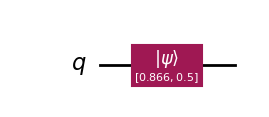

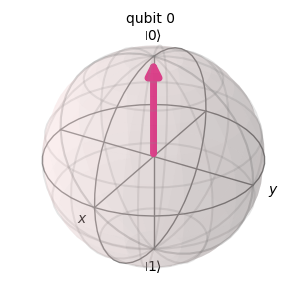

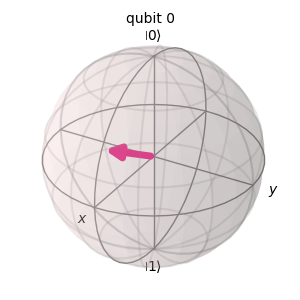

In [3]:
"""
Create a quantum circuit and visualize the initial and final Bloch vectors 
after reinitialization using the function "initialize([alpha, beta], qubit)

"""

# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Run the circuit using the statevector simulator and display the resulting statevector
state_0 = Statevector(qc)

print(f"By default, a qubit is created in the state |𝜓⟩ = ({state_0[0]:.3f})|0⟩ + ({state_0[1]:.3f})|1⟩ = ")
display(state_0.draw('latex'))

# Draw a Bloch sphere for the state_0
plot_bloch_multivector(state_0).set_size_inches(3, 3) # adjust the figure dimensions for visualization purposes

# Define alpha and beta (must satisfy |alpha|^2 + |beta|^2 = 1)
alpha = np.sqrt(3)/2
beta = 1/2

# Initialize the qubit with [alpha, beta]
qc.initialize([alpha, beta], 0)
state = Statevector(qc)
print(f"Qubit state after initialization: |𝜓⟩ = ({state[0]:.3f})|0⟩ + ({state[1]:.3f})|1⟩")
display(state.draw("latex"))

# Bloch vector after initialization
plot_bloch_multivector(state).set_size_inches(3, 3)

# Draw the quantum circuit
qc.draw('mpl')

# Hide header/footer for all open figures at once\n",
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
plt.show()


After initialization, a qubit can exist in a superposition of states. When the qubit is measured, the superposition collapses to a definite classical value, either 0 or 1. The probability of each outcome is determined by the amplitude of the state. For a one-qubit circuit, the probabilities can be written as:

$$ P(0) = |\alpha|^2,  P(1) = |\beta|^2. $$

Measurement results are presented as a histogram constructed from $N$ repeated measurements (shots), together with the outcomes of individual shots, demonstrating the probabilistic nature of quantum measurement.

In [4]:
# Creates a classical register consisting of one classical bit 
cr = ClassicalRegister(1) 
qc.add_register(cr) 

# Add the measurement gate
qc.measure(0, 0) 

| Feature        | AerSimulator (your code)                         | Sampler + transpiled circuit                                 |
| -------------- | ------------------------------------------------ | ------------------------------------------------------------ |
| Simulator type | Classic shot-based simulator                     | Qiskit Runtime primitive, can be exact                       |
| Outputs        | Histogram (`get_counts`) & memory (`get_memory`) | Probabilities or expectation values                          |
| Shots          | `shots=N` determines number of runs              | Optional; by default exact probabilities                     |
| Optimization   | None by default                                  | Uses `generate_preset_pass_manager` for backend optimization |
| Use case       | Test algorithms with measurement randomness      | Compute exact statistics, variational algorithms, primitives |

service = QiskitRuntimeService(channel='ibm_quantum_platform')
backend = service.backend('ibmq_qasm_simulator')

**Define backend**
backend = AerSimulator()
**Transpile to backend**
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
**Run the job**
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()
counts = result[0].data.c.get_counts()

- Go to IBM Quantum and sign up for free.
- After signing in, click on your profile → Account → API Token.
- Copy the API token (it’s a long string of letters/numbers).

https://quantum.cloud.ibm.com/learning/en/courses/utility-scale-quantum-computing/bits-gates-and-circuits

Measurement results: {'1': 23, '0': 77}
['0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1'] ...


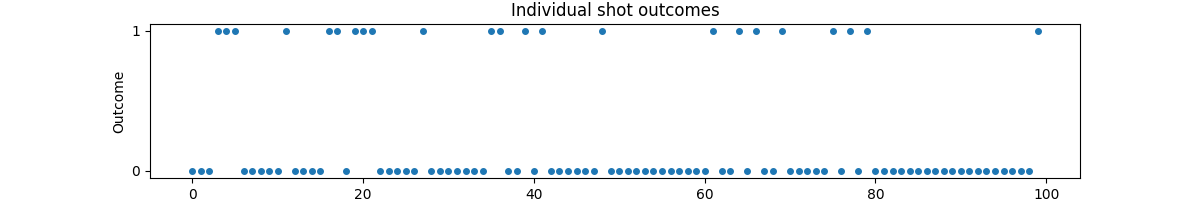

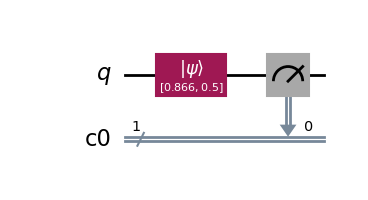

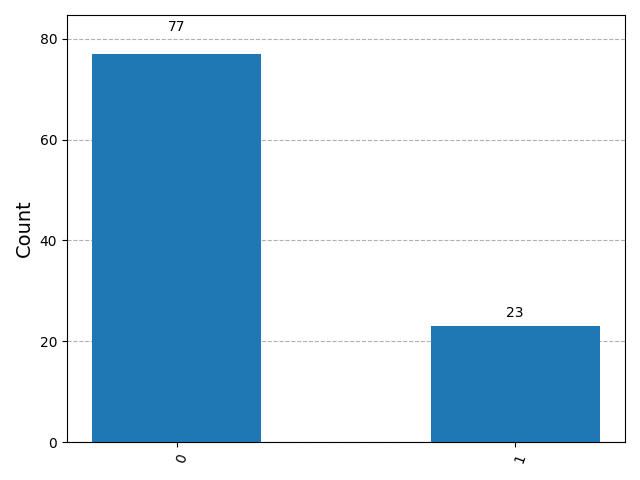

In [5]:
# Simulate measurements using AerSimulator
simulator = AerSimulator()
job = simulator.run(qc,  shots=100, memory=True)
result = job.result()

# Extract counts (histogram of results) and memory (raw shot outcomes)
counts = result.get_counts()
memory = result.get_memory() 

# Print the results
qc.draw('mpl').show()

# Probability distribution for showing the probability distribution of measuring 0 or 1.
plot_histogram(counts)

clear_output()

print("Measurement results:", counts)
print(memory[:20], "...")

# Convert memory from strings to integers for plotting
shots_numeric = [int(x) for x in memory]

# Plot individual shot outcomes
plt.figure(figsize=(12,2))
plt.plot(shots_numeric, 'o', markersize=4)
plt.yticks([0,1])
plt.xlabel("Shot index")
plt.ylabel("Outcome")
plt.title("Individual shot outcomes")
plt.show()

#### 2.4.1. Two-Qubit System

As discussed in Paragraph 2.2, a two-qubit system exists in a joint superposition of four computational basis states: $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$. These states arise from the tensor product of the states of each individual qubit in the circuit. The general state of a two-qubit system can be expressed as shown in Eq. (3) or Eq. (3a).

By default, a qubit is in the state |𝜓⟩ = (1.000+0.000j)|00⟩ + (0.000+0.000j)|01⟩ + 0.000+0.000j)|10⟩ + 0.000+0.000j)|11⟩ 
The qubit is initialized in the state |𝜓⟩ = (0.500+0.000j)|00⟩ + (0.500+0.000j)|01⟩ + 0.707+0.000j)|10⟩ + 0.000+0.000j)|11⟩ 


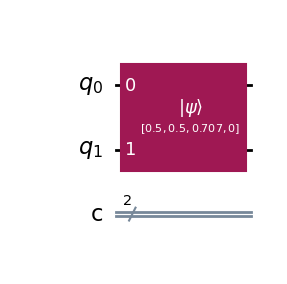

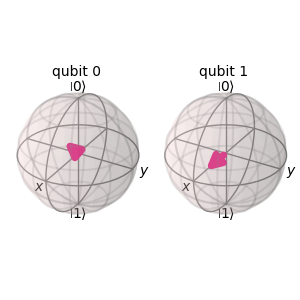

In [6]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc2 = QuantumCircuit(2, 2)

# Get the default statevector (all qubits start in |00⟩)
state2_0 = Statevector(qc2)
print(f"By default, a qubit is in the state |𝜓⟩ = ({state2_0[0]:.3f})|00⟩ + ({state2_0[1]:.3f})|01⟩ + {state2_0[2]:.3f})|10⟩ + {state2_0[3]:.3f})|11⟩ ")

# Initialize the two-qubit state with the given amplitudes 
# (must satisfy ∣α_00​∣^2+∣α_01​∣^2+∣α_10​∣^2+∣α_11​∣^2 = 1)
α00 = 1/2
α01 = 1/2
α10 = 1/np.sqrt(2)
α11 = 0

qc2.initialize([α00, α01, α10, α11])

# Get statevector after initialization
state2 = Statevector(qc2)
print(f"The qubit is initialized in the state |𝜓⟩ = ({state2[0]:.3f})|00⟩ + ({state2[1]:.3f})|01⟩ + {state2[2]:.3f})|10⟩ + {state2[3]:.3f})|11⟩ ")

# Bloch spheres show individual qubit states, not correlations
plot_bloch_multivector(state2).set_size_inches(3, 3)

# Draw the quantum circuit
qc2.draw('mpl')

# Hide header/footer for all open figures at once\n",
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
plt.show()

In [7]:
# Measure qubits 0 and 1, storing the results in classical bits 0 and 1 (rightmost bit = qubit 0, leftmost = qubit 1)

qc2.measure([0,1], [0,1])  # Measure qubit 0 and save the result in bit 0, and measure qubit 1 and save the result in bit 1

Measurement results: {'01': 19, '00': 34, '10': 47}


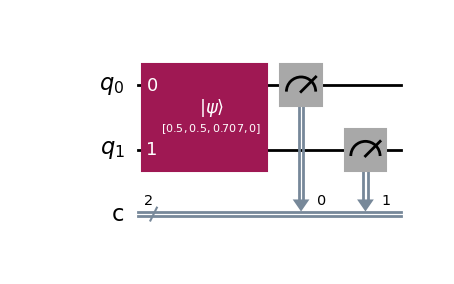

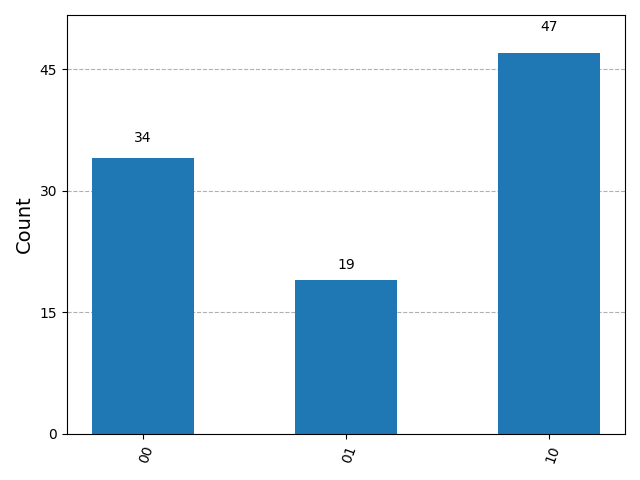

In [8]:
# Simulate measurements using AerSimulator
simulator = AerSimulator()
job = simulator.run(qc2,  shots=100, memory=True)
result = job.result()
counts = result.get_counts(qc2)
memory = result.get_memory() 

# Draw the final  quantum circuit
qc2.draw('mpl').show()

#Plot the histogram of measurement outcomes
plot_histogram(counts)

clear_output()

# Print measurement results
print("Measurement results:", counts)

# Hide header/footer for all open figures at once\n",
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False


## 3. Quantum gates and Circuits

### 3.1. Quantum gates

<u>Quantum gates</u> are reversible, unitary, and linear operations that manipulate qubits and serve as the fundamental building blocks of quantum circuits, analogous to how classical logic gates manipulate classical bits in digital circuits. The properties of quantum gates are defined by the postulates of quantum mechanics (see Chapter 2, Postulate 2).  

Thus, the output state can be obtained by applying a unitary matrix $U$ to the initial state:
$$ 
    |\psi'\rangle = U |\psi\rangle 
$$ 

where $U^\dagger U = U U^\dagger = I$, and $U^\dagger$ denotes the conjugate transpose of $U$. This ensures reversibility and conservation of probability.

The table below presents commonly used single-qubit (1 - 6) and multi-qubit (7 -10) quantum gates, along with their matrix representations and respective functions [3].

| | Name of gate | Gate symbol / Matrix equivalency | Purpose |  
| - | -----------| :----------------: | ------- |
| 1 | Pauli-I (Identity) | $ I = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix} $ | Leaves the qubit unchanged: <br> $I\|0\rangle = \|0\rangle$ <br> $ I\|1\rangle = \|1\rangle $ | 
| 2 | Pauli-X (NOT) | $ X = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix} $ | Similar to the classical NOT gate, <br> Flips computational basis states: <br> $ X\|{0}\rangle = \|{1}\rangle $<br> $ X\|{1}\rangle = \|{0}\rangle $ <br> Rotation by $\pi$ around the x-axis.|
| 3 | Pauli-Y | $ Y = \begin{pmatrix}0 & -i \\ i & 0\end{pmatrix} $ | Flips the computational basis states, <br> Adds a relative phase of $ \pm i$ :<br> $ Y\|{0}\rangle = i\|{1}\rangle $ <br> $ Y\|{1}\rangle = -i\|{0}\rangle$, <br>  Rotation by $\pi$ around the y-axis. |
| 4 | Pauli-Z | $ Z = \begin{pmatrix}1 & 0 \\0 & -1\end{pmatrix} $ | Leaves $\|0\rangle$ unchanged,<br> Adds a relative phase of $\pi$ to $\|1\rangle$:  <br> $ Z\|{0}\rangle = \|{0}\rangle $<br> $ Z\|{1}\rangle = -\|{1}\rangle $, <br> Rotation by $\pi$ around the z-axis,|
| 5 | Hadamard |$ H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\1 & -1\end{pmatrix} $ |Creates superposition, <br> Converts between the z and x basis: <br>  $ H\|{0}\rangle = \frac{\|{0}\rangle + \|{1}\rangle}{\sqrt{2}} $<br> $ H\|{1}\rangle = \frac{\|{0}\rangle - \|{1}\rangle}{\sqrt{2}} $ |
| 6 | Phase gate| $ S = \begin{pmatrix}1 & 0 \\0 & i\end{pmatrix} $ | Adds a relative phase of $e^{i\pi/2}$ to $\|{1}\rangle:$ <br> $ S\|{0}\rangle = \|{0}\rangle $<br> $ S\|{1}\rangle = i\|{1}\rangle $ |
| 7 | Controlled-NOT | $ \text{CNOT} =\begin{pmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{pmatrix} $ | Flips target qubit if control qubit is $\|{1}\rangle $ |
| 8 | Controlled-Z | $ \text{CZ} = \begin{pmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{pmatrix} $ | Applies phase flip if control qubit is $\|{1}\rangle $|
| 9 | SWAP | $ \text{SWAP} = \begin{pmatrix}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{pmatrix} $ | Swaps the states of two qubits |
| 10 | CCNOT (Toffoli) | $\text{CCNOT} = \begin{pmatrix}1&0&0&0&0&0&0&0\\0&1&0&0&0&0&0&0\\0&0&1&0&0&0&0&0\\0&0&0&1&0&0&0&0\\0&0&0&0&1&0&0&0\\0&0&0&0&0&1&0&0\\0&0&0&0&0&0&0&1\\0&0&0&0&0&0&1&0\end{pmatrix} $ | Flips target qubit if both control qubits are 1 |


#### 3.1.1. Single-Qubit Gates

- <u> Hadamard gate </u>  acts on a single qubit and converts a definite state $|{0}\rangle$ or $|{1}\rangle$ into a **superposition** of both states. For this reason, it is frequently used to generate superposition in quantum circuits:

$$
H|{0}\rangle
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 \\ 1 \end{bmatrix} 
= \frac{|{0}\rangle + |{1}\rangle}{\sqrt{2}} 
= |{+}\rangle,
$$

$$
H|{1}\rangle
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 \\ -1 \end{bmatrix} 
= \frac{|{0}\rangle - |{1}\rangle}{\sqrt{2}} 
= |{-}\rangle.
$$

The general action of the Hadamard gate on an arbitrary single-qubit state is given by:

$$
H|{\psi}\rangle 
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} \alpha \\ \beta \end{bmatrix} 
= \frac{1}{\sqrt{2}}
\begin{bmatrix} \alpha + \beta \\ \alpha - \beta \end{bmatrix}
= \frac{1}{\sqrt{2}}
\left[
(\alpha + \beta)|{0}\rangle
+ (\alpha - \beta)|{1}\rangle
\right].
$$

By default, a qubit is created in the state |𝜓⟩ = (1.000+0.000j)|0⟩ + (0.000+0.000j)|1⟩ 
The qubit state after the application of the Hadamard gate: |𝜓⟩ = (0.707+0.000j)|0⟩ + (0.707+0.000j)|1⟩ 


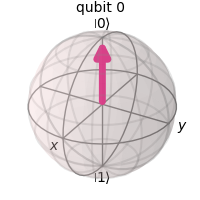

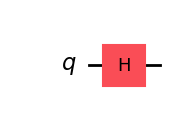

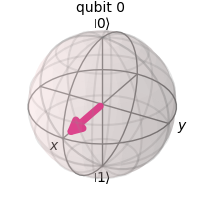

In [9]:
# Create a quantum circuit and visualize the initial and final Bloch vectors.
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Creates a circuit with 1 qubit
qc_h = QuantumCircuit(1)

# Initial state
state_0 = Statevector(qc_h)
print(f"By default, a qubit is created in the state |𝜓⟩ = ({state_0[0]:.3f})|0⟩ + ({state_0[1]:.3f})|1⟩ ")

plot_bloch_multivector(state_0).set_size_inches(2, 2)

# Apply Hadamard gate
qc_h.h(0)

# Draw the circuit
qc_h.draw('mpl')

# State after the application of the Hadamard gate
state_h = Statevector(qc_h)
print(f"The qubit state after the application of the Hadamard gate: |𝜓⟩ = ({state_h[0]:.3f})|0⟩ + ({state_h[1]:.3f})|1⟩ ")

plot_bloch_multivector(state_h).set_size_inches(2, 2)

# Hide header/footer for all open figures at once\n",
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
# clear_output()


To illustrate mesurement in the case of superposition, consider a qubit that is in the state $|\psi\rangle =  \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ after applying a Hadamard gate to a qubit initially in the state $|0\rangle$. As can be observed, after measurement there is a 50% probability of obtaining the outcome 0 and a 50% probability of obtaining the outcome 1. Upon measurement, the qubit collapses into one of these two basis states, and the measurement outcome becomes known.

In [10]:
# Add classical register 
cr = ClassicalRegister(1) 
qc_h.add_register(cr) 

qc_h.measure(0, 0)

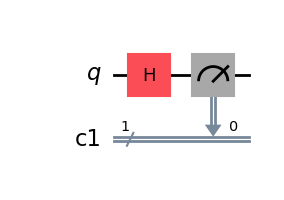

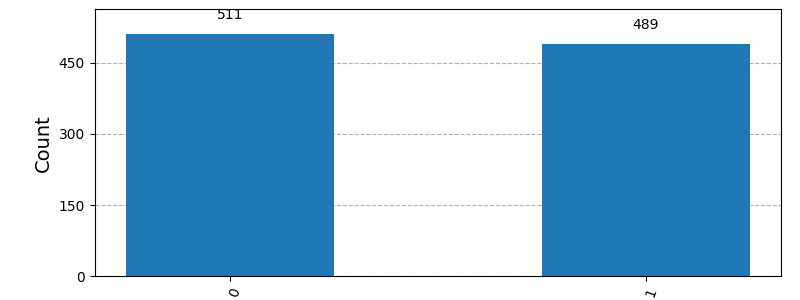

In [11]:
# Simulate measurements using AerSimulator
simulator = AerSimulator()
job = simulator.run(qc_h, shots=1000, memory=True)
result = job.result()
# Extract counts (histogram of results) and memory (raw shot outcomes)
counts = result.get_counts()

# Draw the final circuit
qc_h.draw('mpl').show()

# Probability distribution for showing the probability distribution of measuring 0 or 1.
plot_histogram(counts).set_size_inches(8, 3)

clear_output()


- <u> Pauli-X gate </u>, also known as the **quantum NOT gate**, acts on a single qubit and flips its state:

$$
X |0\rangle =
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
= |1 \rangle
$$

$$
X|0\rangle =
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
= |0\rangle
$$

The general action of the Pauli-X gate on an arbitrary qubit state is

$$
X |\psi\rangle =
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix} \alpha \\ \beta \end{bmatrix}
=
\begin{bmatrix} \beta \\ \alpha \end{bmatrix}
=
\beta \, |0\rangle + \alpha \, |1\rangle
$$

By default, a qubit is created in the state |𝜓⟩ = (1.000+0.000j)|0⟩ + (0.000+0.000j)|1⟩ 
The qubit state after after applying the NOT gate: |𝜓⟩ = (0.000+0.000j)|0⟩ + (1.000+0.000j)|1⟩ 


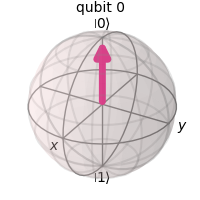

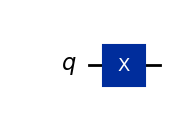

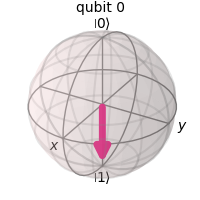

In [12]:
# Creates a circuit with 1 qubit
qc_x = QuantumCircuit(1)

# Initial state
state_0 = Statevector(qc_x)
print(f"By default, a qubit is created in the state |𝜓⟩ = ({state_0[0]:.3f})|0⟩ + ({state_0[1]:.3f})|1⟩ ")

plot_bloch_multivector(state_0).set_size_inches(2, 2)

# Apply Pauli-X gate for qubit 0
qc_x.x(0)

# Draw the circuit
qc_x.draw('mpl')

state_x = Statevector(qc_x)
print(f"The qubit state after after applying the NOT gate: |𝜓⟩ = ({state_x[0]:.3f})|0⟩ + ({state_x[1]:.3f})|1⟩ ")

plot_bloch_multivector(state_x).set_size_inches(2, 2)

# Hide header/footer for all open figures at once\n",
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
# clear_output()


- The <u>Pauli-Y gate</u> swaps the amplitudes of the basis states like the X gate but adds a relative phase of $\pm i$, making it essential for **phase-sensitive operations** in quantum circuits.

$$
Y |0 \rangle =
\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 0 \\ i \end{bmatrix}
= i |1\rangle
$$

$$
Y |1\rangle =
\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
=
\begin{bmatrix} -i \\ 0 \end{bmatrix}
= -i|0\rangle
$$

The general action of the Pauli-Y gate on an arbitrary qubit state is

$$
Y |\psi\rangle =
\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\begin{bmatrix} \alpha \\ \beta \end{bmatrix}
=
\begin{bmatrix} -i \beta \\ i \alpha \end{bmatrix}
=
-i \beta \, |0\rangle + i \alpha \, |1\rangle
$$

By default, a qubit is created in the state |𝜓⟩ = (1.000+0.000j)|0⟩ + (0.000+0.000j)|1⟩ 
The qubit state after after applying the NOT gate: |𝜓⟩ = (0.000+0.000j)|0⟩ + (0.000+1.000j)|1⟩ 


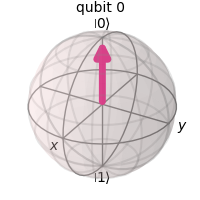

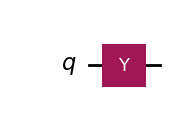

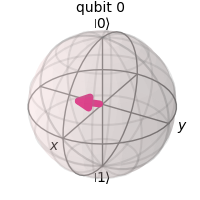

In [14]:
# Creates a circuit with 1 qubit
qc_y = QuantumCircuit(1)

# Initial state
state_0 = Statevector(qc_y)
print(f"By default, a qubit is created in the state |𝜓⟩ = ({state_0[0]:.3f})|0⟩ + ({state_0[1]:.3f})|1⟩ ")
plot_bloch_multivector(state_0).set_size_inches(2, 2)

# Apply Pauli-X gate for qubit 0
qc_y.y(0)

# Draw the circuit
qc_y.draw('mpl')

state_y = Statevector(qc_y)
print(f"The qubit state after after applying the NOT gate: |𝜓⟩ = ({state_y[0]:.3f})|0⟩ + ({state_y[1]:.3f})|1⟩ ")

plot_bloch_multivector(state).set_size_inches(2, 2)

# Hide header/footer for all open figures at once\n",
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
# clear_output()

Both the **Pauli-X** and **Pauli-Y** gates exchange the computational basis states $|0\rangle$ and $|1\rangle$. However, the Pauli-Y gate additionally introduces a relative phase factor. Geometrically, these gates correspond to rotations by $\pi$ around the x- and y-axes of the Bloch sphere, respectively. This phase difference plays an important role in quantum interference and highlights how these operations differ from classical bit flips. In contrast, the **Pauli-Z** gate leaves the computational basis states unchanged in amplitude but adds a relative phase to $|1\rangle$, unlike the Pauli-X and Y gates, which also flip the states.

#### 3.1.2. Multi-qubit Gates

As an example of a multi-qubit gate, let us consider the <u>Controlled-NOT (CNOT) gate</u>, which acts on two qubits as a single quantum system: it flips the state of the target qubit if the control qubit is in the state $|1\rangle$.

$$ \text{CNOT}\,|00\rangle =
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
= |00\rangle $$

For the other basis states, the same procedure applies:

$$ \text{CNOT}\,|01\rangle = |01\rangle, \quad

\text{CNOT}\,|10\rangle = |11\rangle, \quad

\text{CNOT}\,|11\rangle = |10\rangle.$$

The general action of the CNOT gate on an arbitrary two-qubit state is
$$
\text{CNOT}\,|11\rangle =
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix} \alpha_{00} \\ \alpha_{01} \\ \alpha_{01} \\ \alpha_{11} \end{bmatrix}
=
\begin{bmatrix} \alpha_{00} \\ \alpha_{01} \\ \alpha_{01} \\ \alpha_{11} \end{bmatrix}
= \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle
$$

The **CNOT gate** is one of the most commonly used gates for demonstrating **entanglement** (see Paragraph 2.4), usually in combination with a Hadamard gate.

How it works:

- Start with a two-qubit system in the initial state $|0 0\rangle$. The computational basis ordered as  $|q_1 q_0\rangle$, where $q_1$ is the control qubit - left, $q_0$ is the target qubit - right.


- Apply a <u>Hadamard gate</u> to the first qubit (the control qubit) to create a superposition on it:

$$
    H|0\rangle \otimes |0\rangle =\left( \frac{|0\rangle + |1\rangle}{\sqrt{2}} \right) \otimes |0\rangle = \frac{|00\rangle + |10\rangle}{\sqrt{2}},
$$

Now the two-qubit system is in a superposition of two states: $|00\rangle - q_1 = 0, q_0 = 0$ and $ |10\rangle - q_1 = 1, q_0 = 0 $, where the first qubit is in a superposition of 0 and 1, while the second qubit remains 0.


- Apply a CNOT gate, which flips the target qubit only if the control qubit is 1 (standard gate action):

$$
\text{CNOT} \left( \frac{|00\rangle + |10\rangle}{\sqrt{2}} \right)
=
\frac{|00\rangle + |11\rangle}{\sqrt{2}}.
$$

The new state is not separable, no common qubits can be taken out. So, these <u>two qubits are now maximally **entangled**, forming a **Bell state**</u> [[4]](https://doi.org/10.3390/quantum7030039).

The algorithm described above can be implemented in Python using [Qiskit](https://quantum.cloud.ibm.com/docs/en/guides) to demonstrate entanglement - a quantum phenomenon, where qubits become strongly correlated such that the state of one qubit cannot be described independently of the other.

By default, a qubit is created in the state |𝜓⟩ = (1.000+0.000j)|00⟩ + (0.000+0.000j)|01⟩ + 0.000+0.000j)|10⟩ + (0.000+0.000j)|11⟩  
After apply Hadamard gate |𝜓⟩ = (0.707+0.000j)|00⟩ + (0.707+0.000j)|01⟩ + 0.000+0.000j)|10⟩ + (-0.000+0.000j)|11⟩  
After apply CNOT gate |𝜓⟩ = (0.707+0.000j)|00⟩ + (0.000+0.000j)|01⟩ + 0.000+0.000j)|10⟩ + (0.707+0.000j)|11⟩  


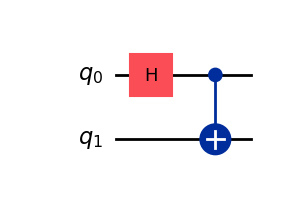

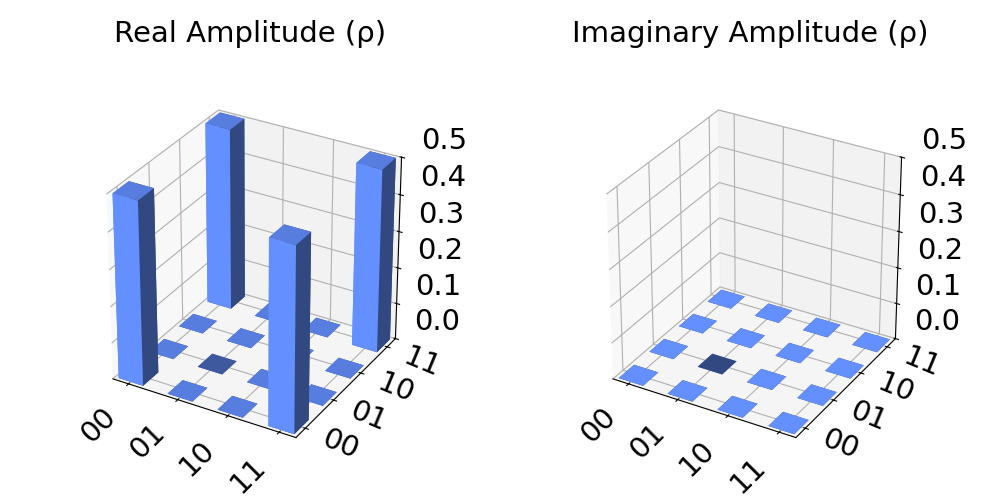

In [15]:
# Demonstration entranglement of two qubits
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram

# Create a 2-qubit quantum circuit
qc_e = QuantumCircuit(2)
state_0 = Statevector(qc_e)

print(f"By default, a qubit is created in the state |𝜓⟩ = ({state_0[0]:.3f})|00⟩ + ({state_0[1]:.3f})|01⟩ + {state_0[2]:.3f})|10⟩ + ({state_0[3]:.3f})|11⟩  ")

# 1: Apply Hadamard gate to the left qubit to create superposition
qc_e.h(0)

state_h = Statevector(qc_e)
print(f"After apply Hadamard gate |𝜓⟩ = ({state_h[0]:.3f})|00⟩ + ({state_h[1]:.3f})|01⟩ + {state_h[2]:.3f})|10⟩ + ({state_h[3]:.3f})|11⟩  ")

# 2: Apply CNOT gate (q1=control, q0=target) to entangle the qubits
qc_e.cx(0, 1)
state_cx = Statevector(qc_e)
print(f"After apply CNOT gate |𝜓⟩ = ({state_cx[0]:.3f})|00⟩ + ({state_cx[1]:.3f})|01⟩ + {state_cx[2]:.3f})|10⟩ + ({state_cx[3]:.3f})|11⟩  ")

# Draw the quantum circuit
qc_e.draw('mpl')

# Visualize the statevector
plot_state_city(state_cx).set_size_inches(10,5) # density-matrix

# Hide header/footer for all open figures at once\n",
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
# clear_output()


In [16]:
cr = ClassicalRegister(2) 
qc_e.add_register(cr) 
qc_e.measure([0,1], [0,1])

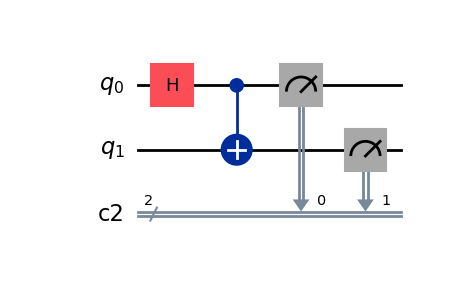

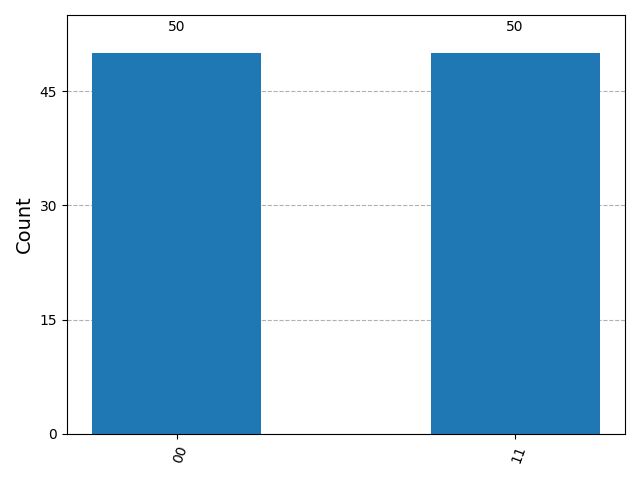

In [17]:
simulator = AerSimulator()
job = simulator.run(qc_e,  shots=100, memory=True)
result = job.result()
counts = result.get_counts(qc_e)
memory = result.get_memory() 

# Draw the final  quantum circuit
qc_e.draw('mpl').show()

#Plot the histogram of measurement outcomes
plot_histogram(counts)

clear_output()


In [18]:
from qiskit.quantum_info import DensityMatrix, concurrence

dm = DensityMatrix(state_cx)
print("Concurrence =", concurrence(dm))

Concurrence = 0.9999999999999994


**Verify that the obtained result corresponds to a maximally entangled state:**

The quantum state obtained is 
$$|\Psi^+ \rangle = (0.707+0.000j)|00\rangle + (0.000+0.000j)|01\rangle + (0.000+0.000j)|10\rangle + (0.707+0.000j)|11\rangle$$

which which is equivalent (up to numerical precision) to the Bell state  $|\Psi^+ \rangle  = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle$ .

This state is maximally entangled, as justified by the following points:

- The state  $|\Psi \rangle ^+$ cannot be decomposed as a tensor product.

- The density matrix cannot be diagonalized in any product basis. These off-diagonal elements represent quantum coherence between joint states and are a signature of entanglement.

$$
\rho = \frac{1}{2} \Big( |00\rangle\langle 00| + |00\rangle\langle 11| + |11\rangle\langle 00| + |11\rangle\langle 11| \Big).
$$
- The measurement histogram shows nonzero probabilities only for the states: $|11\rangle$ and $|00\rangle$  (see histogram).
- The concurrence calculated for this state is 1.


The combination of the $ \text{H}$ gate, the $\text{T}$ gate ($\text {T}^2 = \text{S}$), and the $\text{CNOT}$ gate is universal set of quantum gates,  that enables to construc of any quantum circuit, making quantum computers flexible and scalable for a wide range of applications. 

## 4. Application of Quantum Computing

Quantum computing holds significant potential for addressing a wide range of problems across disciplines such as:

- **Communication** – *Quantum key distribution* (QKD) enables secure channels by detecting eavesdropping, while *quantum teleportation* allows transfer of quantum states over distance [5].

- **Data Processing** – *Quantum machine learning* can analyze and classify large datasets faster than classical methods, aiding medical imaging and satellite analysis [6].

- **Information Theory** – *Quantum algorithms for linear systems* can extract structure from massive datasets, improving processing speed.

- **Transportation and Logistics** – *Quantum optimization* improves route planning and supply-chain management, reducing delivery times and costs.

- **Cybersecurity and Cryptography** – Shor’s algorithm factors large integers exponentially faster than classical methods, challenging current encryption and motivating quantum-safe cryptography [7].

- **Sciences** (Chemistry, Material Science, Biology, Physics) – *Quantum simulations* model molecular and material systems beyond classical capabilities, accelerating materials design and and scientific research [8].

- **Medicine** – Quantum simulations predict molecular interactions, speeding up the development of new therapies, drug discovery, DNA-sequencing, medical-imaging etc [9],[10].

These examples illustrate some key directions where quantum computing can be applied, ranging from optimization and simulation to secure communication through quantum teleportation. In all these areas, quantum computing offers the capability to perform tasks that are currently computationally infeasible for classical computing systems with existing resources.

Despite its significant potential, <u>quantum computing remains in an early and largely experimental stage</u> and faces several fundamental and practical challenges, including the gap between theoretical quantum speedup and current hardware limitations, physical qubit constraints, decoherence, as well as the difficulties of managing noise and stability.

Addressing these challenges requires coordinated development across multiple areas[11, 12], such as
- **hardware** realization, 
- overcoming **physical and thermodynamic limitations**, 
- **error correction** and **decoherence control**, 
- advances in **algorithmic design and software implementation**. 

A clear quantum development [roadmap, as presented by IBM](https://www.ibm.com/quantum/blog/ibm-quantum-roadmap-2025), provides guidance for coordinated progress across all of these areas, enabling scalable, reliable, and efficient quantum systems in the future.

### 4.1. Physical Realisation and Quantum Hardware

The key components of a quantum computer are:

> <u>Quantum Processor Unit</u> (QPU) is responsible for executing quantum algorithms and performing quantum computations, including the application of quantum gates that manipulate the states of qubits. The QPU is analogous to the CPU in classical computers.

**Based component of a QPU:**
- **Qubits** can be realized using various physical technologies, which determine the design, performance, and operating characteristics of a quantum computer [1]. Some of the most common implementations are listed below: 


| **Qubit Technology**        | **Physical Principle**   | **Key Challenges / Advantages**   | **Typical Applications**          |
| ---------------------------- | ------------------------------- |-------------------------------- | -------------------- |
| **Superconducting Circuits** | Energy levels of Cooper pairs—pairs of electrons bound at low temperatures—across a [Josephson junction](https://qtechedu.centralesupelec.fr/EN/ex4.html) | Requires extremely low temperatures (millikelvin) to avoid decoherence | General-purpose quantum computing |
| **Trapped-Ion Technology**   | Qubits are encoded in two energy levels of trapped ions (e.g., calcium or ytterbium ions)  | Slower gate speeds, complex laser control, difficulty scaling to large numbers of qubits | Quantum simulation, cryptography  |
| **Photonic Qubits**     | Use properties of photons, such as polarization or phase, to represent qubit states                    | Operates at room temperature, minimal decoherence | Quantum communication  |
| **Spin Qubits**         | Based on the spin states of electrons or nuclei | Compatibility with semiconductor technology; difficult to scale to large systems | Quantum simulation, cryptography  |


- **Quantum Gates** perform controlled operations on qubits, enabling the execution of quantum algorithms and allowing computations that are infeasible for classical computers.

- **Interconnects** enable communication between qubits and, in some architectures, between multiple quantum processors. They are essential for scaling quantum systems and supporting complex computations.

> 1. <u>Control Electronics</u> generate and manage the signals (microwave, radio-frequency, or laser pulses) required to manipulate qubit states, maintain coherence, perform accurate quantum operations, and ensure precise timing and synchronization. 

> 2. <u>Cryogenic System </u> cools the quantum hardware to temperatures typically around 10–20 millikelvin. It isolates the processor from thermal noise and environmental disturbances, which is especially critical for systems using superconducting qubits to preserve coherence and minimize decoherence.

> 3. <u> Quantum Error Correction Infrastructure</u> is essential for ensuring reliable quantum computations. Qubits are highly sensitive to noise and decoherence, which can introduce errors that must be detected and corrected during computation.

> 4. <u>Classical Computing Interface</u> acts as a bridge between the quantum computer and classical systems. It manages the execution flow, handles input and output, and assists with tasks such as measurement processing and error correction calculations.

> 5. <u>Quantum Interconnects</u> are responsible for transmitting quantum information within a quantum computer and between separate quantum systems, enabling quantum communication, distributed quantum computing, and quantum networking.

To illustrate current quantum computing hardware implementations the quantum research control chip developed by [Intel](https://newsroom.intel.com/new-technologies/quantum-computing-chip-to-advance-research) is shown on the left, and a new quantum chip presented by [Microsoft](https://quantum.microsoft.com/en-us/solutions/microsoft-quantum-hardware) is shown on the right.
<div style="text-align: center;">
<img src="Figures_QC/QC.png" alt="Quantum computing" width="50%"  />
</div>

A number of prominent companies, such as IBM, Google, Microsoft, and Amazon, among others, are actively developing quantum computing technologies. According to [Augmented Qubit](https://augmentedqubit.com/list-of-quantum-computers/?utm_source=chatgpt.com), there are currently over 100 operational quantum processors worldwide, ranging from small NISQ devices (~5–50 qubits) to large-scale processors exceeding 1,000 qubits and this number is expected to grow rapidly as hardware technologies continue to advance and more companies enter the field.

### 4.2. Quantum Algorithms

A **quantum algorithm** is a finite sequence of instructions, or a step-by-step procedure, designed to solve a computational problem using a quantum computer. Unlike classical algorithms, quantum algorithms exploit fundamental properties of quantum mechanics, such as superposition, entanglement, and quantum interference, to achieve computational advantages.

Quantum algorithms are developed within different models of quantum computation, each based on the laws of quantum physics. The most common models include: gate-based (quantum circuit) model, quantum annealing or Measurement-Based Quantum Computing (MBQC) models. 

In this notebook we use the quantum circuit model, where a quantum algorithm is represented  graphicaly as a sequence of quantum gates applied to qubits. A quantum circuit typically consists of the following stages:

- Initialization: Qubits are prepared in a known initial state.

- Unitary Operations: Quantum gates implement the logic of the algorithm. These operations are reversible and correspond to unitary transformations.

- Interference: Quantum amplitudes interfere constructively or destructively, amplifying correct outcomes and suppressing incorrect ones.

- Measurement: The final quantum state is measured, producing a classical output.

The application of quantum computing relies heavily on the implementation of quantum algorithms, making algorithm design one of the key research and development areas in quantum computing. Efficient algorithms are essential for demonstrating quantum advantage over classical approaches.

- [Grover’s Algorithm](https://quantum.cloud.ibm.com/learning/en/courses/utility-scale-quantum-computing/grovers-algorithm) - Grover's algorithm searches an unstructured database (or an unordered list) with N entries for a marked entry, using only $ O({\sqrt {N}})$ queries instead of the $ O({N})$ queries required classically.

- [Shor’s Algorithm](https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring/shor-algorithm) - solves the discrete logarithm problem and the integer factorization problem in polynomial time.

- [Variational quantum eigensolver](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/vqe)
The variational quantum eigensolver (VQE) algorithm applies classical optimization to minimize the energy expectation value of an ansatz state to find the ground state of a Hermitian operator, such as a molecule's Hamiltonian.[52] It can also be extended to find excited energies of molecular Hamiltonians.

- Quantum Cryptography Algorithms. 

#### 4.2.1 Application: VQE algoritm for eigenvalue problems

The **variational quantum eigensolver** ([VQE](https://doi.org/10.1063/5.0161057)) is a hybrid quantum–classical algorithm that employs a variational principle to find approximate solutions to optimization and quantum simulation problems [13,14]. In VQE, the goal is to approximate the ground-state energy of a quantum system described by a qubit Hamiltonian by adjusting variational parameters $\theta$:  
$$ 
    min_{\theta}\langle\psi(\theta_i)|H_\text{qubit}|\psi(\theta_i\rangle.
$$
This minimum eigenvalue corresponds to the ground-state energy of the quantum system. The algorithm begins by preparing an initial quantum state $ | \psi \rangle $, which is typically chosen as the computational basis state $ | 0 \rangle$ state. A parameterized quantum circuit, known as the ansatz $ U(\theta)$ is then applied to generate a trial quantum state $|\psi \rangle$. Measurements of this state are performed to estimate the expectation value of the Hamiltonian, which serves as the objective observable. A classical optimizer iteratively updates the variational parameters based on the measurement outcomes, seeking to minimize the energy expectation value. This quantum–classical feedback loop is repeated until convergence is reached. The resulting energy provides an approximation to the ground-state energy of the system.

<div style="text-align: center;">
<img src="Figures_QC/VQE.png" alt="Quantum computing. Algorithm VQE" width="50%"  />
</div>

    VQE is primarily used in quantum chemistry and materials science to estimate the ground-state energies of molecular and solid-state systems. As system size increases, many classical approaches become increasingly computationally demanding. VQE provides a promising alternative by combining quantum resources with classical optimization, enabling efficient exploration of complex quantum systems.

Today, the VQE algorithm has been implemented in numerous quantum computing frameworks, including [IBM](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/vqe), [Qnivers](https://qniverse.in/docs/variational-quantum-eigensolver-vqe/), [Qulacs](https://dojo.qulacs.org/en/latest/notebooks/6.2_qulacs_VQE.html) etc.

In this notebook, the main stages of the VQE algorithm are demonstrated using Qiskit (v.2.3.0) by IBM to compute the <u>ground-state energy of the hydrogen molecule at different internuclear distances</u> [15].

1. **Building the physical model**. The molecular system is defined using the PySCF, which performs a classical electronic structure calculation to generate the fermionic Hamiltonian. This Hamiltonian  serves as the input for the subsequent qubit mapping and VQE procedure. In this example, the hydrogen molecule ($H_2$) is modeled with a variable internuclear distance $R$:

- The <u>STO-3G</u> minimal basis set is used to represent the electronic orbitals.

- The system is assumed to be neutral (charge=0) and in a spin-singlet state (spin=0).

2. **Hamiltonian Preparation**. The electronic Hamiltonian of the molecular system is mapped onto a qubit Hamiltonian using a fermion-to-qubit transformation. After this mapping, the Hamiltonian can be written as a weighted sum of Pauli operators acting on qubits:
$$
   H_{\text{qubit}} = \sum_{i} c_i\, P_i, \quad P_i \in \{I, X, Y, Z\}^{\otimes n} .
$$

This representation makes the Hamiltonian compatible with quantum circuit execution and measurement. 

3. **Ansatz Preparation**. An ansatz is a parameterized quantum circuit that defines a family of trial quantum states from which the optimizer searches for the ground state of the Hamiltonian:
$$ 
   |\psi(\theta)\rangle = U(\theta)|\text{initial state}\rangle.
$$
  
Qiskit provides various types of ansatz and choice of ansatz depends on the physical system being modeled. In this notebook, both <u>n_local</u> ansatz and <u>UCCSD</u> (Unitary Coupled Cluster Singles & Doubles) ansatz are demonstrated. A well-chosen ansatz is crucial for convergence of the algorithm.

4. **Quantum Circuit Execution**. In this notebook, a statevector-based estimator is used, allowing exact expectation value evaluation in a noiseless simulation. On real quantum hardware, these expectation values are obtained statistically from repeated circuit executions.

5. **Classical Optimization**. A classical optimizer iteratively updates the variational parameters $\theta$ to minimize the energy, forming a quantum–classical feedback loop. In this notebook, the <u>SPSA</u> and <u>COBYLA</u> optimizers are used.

    The choice of ansatz (e.g., UCCSD, n_local), optimizer (e.g., SPSA, COBYLA), qubit mapping (e.g., Jordan-Wigner, Parity, Bravyi-Kitaev), and basis set (e.g., STO-3G, 6-31G) depends on the modeled system and is crucial for VQE convergence and obtaining accurate ground-state results.

In [19]:
import warnings
from scipy.sparse import SparseEfficiencyWarning

# suppress sparse efficiency warnings
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)


R = 0.50 Å  ->  Energy= -1.055001 Hartree
R = 0.55 Å  ->  Energy= -1.093271 Hartree
R = 0.60 Å  ->  Energy= -1.116973 Hartree
R = 0.65 Å  ->  Energy= -1.130182 Hartree
R = 0.71 Å  ->  Energy= -1.136485 Hartree
R = 0.76 Å  ->  Energy= -1.136877 Hartree
R = 0.81 Å  ->  Energy= -1.133335 Hartree
R = 0.86 Å  ->  Energy= -1.126962 Hartree
R = 0.91 Å  ->  Energy= -1.118726 Hartree
R = 0.96 Å  ->  Energy= -1.109029 Hartree
R = 1.01 Å  ->  Energy= -1.098352 Hartree
R = 1.06 Å  ->  Energy= -1.087045 Hartree
R = 1.12 Å  ->  Energy= -1.075723 Hartree
R = 1.17 Å  ->  Energy= -1.064133 Hartree
R = 1.22 Å  ->  Energy= -1.052749 Hartree
R = 1.27 Å  ->  Energy= -1.041621 Hartree
R = 1.32 Å  ->  Energy= -1.030920 Hartree
R = 1.37 Å  ->  Energy= -1.020770 Hartree
R = 1.42 Å  ->  Energy= -1.011223 Hartree
R = 1.47 Å  ->  Energy= -1.002297 Hartree
R = 1.53 Å  ->  Energy= -0.994118 Hartree
R = 1.58 Å  ->  Energy= -0.943205 Hartree
R = 1.63 Å  ->  Energy= -0.979775 Hartree
R = 1.68 Å  ->  Energy= -0.973681 

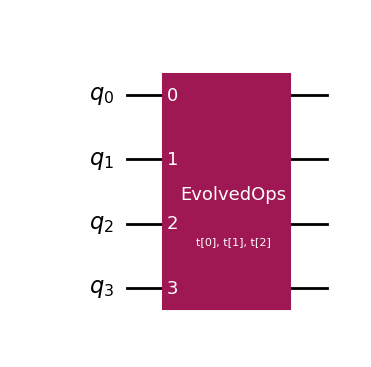

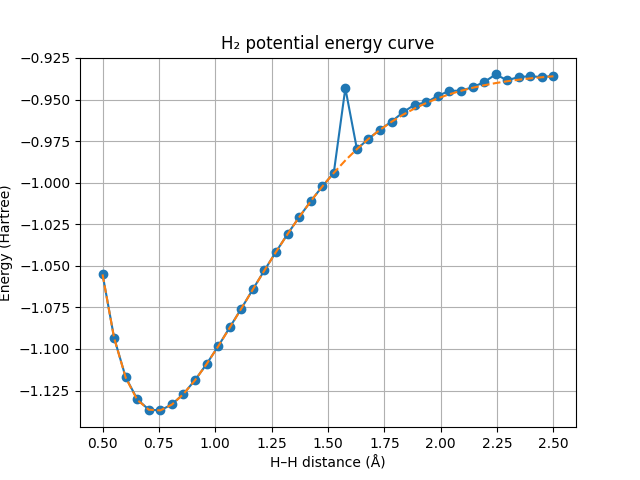

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import UCCSD
from qiskit.circuit.library import n_local

from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.optimizers import COBYLA

from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.circuit.library import HartreeFock
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

exact_solver = NumPyMinimumEigensolver()
estimator = Estimator()
mapper = ParityMapper()

distances = np.linspace(0.5, 2.5, 40)
energies = []
energies_class = []
energies_iter = []

def callback(eval_count, params, energy, stddev): # observation the learning process
    energies_iter.append(energy)

for R in distances:

# Building the model using PySCF
    driver = PySCFDriver(
        atom=f"H 0 0 0; H 0 0 {R}",
        basis="sto3g", # 6-31G
        charge=0,
        spin=0,
    )

#     driver = PySCFDriver(
#     atom = "O 0.0 0.0 0.0; H 0.0 -0.757 0.587; H 0.0 0.757 0.587",
#     basis="sto3g",
#     charge=0,
#     spin=0
# )

    problem = driver.run()
    
# Map fermionic Hamiltonian → qubit Hamiltonian
    second_q_ops = problem.second_q_ops()[0]
    mapper = JordanWignerMapper()
    qubit_hamiltonian = mapper.map(second_q_ops)

# Create Hartree-Fock initial state (specific to this Hamiltonian)
    hf_state = HartreeFock(
        num_spatial_orbitals=problem.num_spatial_orbitals,
        num_particles=problem.num_particles,
        qubit_mapper=mapper
    )
# Ansatz preparation (quantum model)

    # ansatz = n_local(
    #     num_qubits=qubit_hamiltonian.num_qubits, # number of qubits in your mapped Hamiltonian
    #     rotation_blocks=["ry"], #type of rotations (["ry","rz"] is more expressive than just "ry")
    #     entanglement_blocks="cz", # type of entanglement (e.g., "cz" or "cx")
    #     entanglement="linear",  # linear instead of full
    #     reps=1
    # )
    ansatz = UCCSD(
        num_spatial_orbitals=problem.num_spatial_orbitals,
        num_particles=problem.num_particles,
        qubit_mapper=mapper,
        initial_state=hf_state
    )

  # Optimizer & VQE
    optimizer = SPSA (maxiter=150) 
    # optimizer = COBYLA(maxiter=200)

    vqe = VQE(ansatz=ansatz, optimizer=optimizer, estimator=estimator, callback=callback)

    result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)

    electronic_energy = np.real(result.eigenvalue)
    nuclear_repulsion = problem.nuclear_repulsion_energy
    total_energy = electronic_energy + nuclear_repulsion
    energies.append(total_energy)
    
    print(f"R = {R:.2f} Å  ->  Energy= {total_energy:.6f} Hartree")

# Classical (exact)
    exact_result = exact_solver.compute_minimum_eigenvalue(qubit_hamiltonian)
    energies_class.append(np.real(exact_result.eigenvalue + nuclear_repulsion))


print(qubit_hamiltonian)
print("Number of qubits:", qubit_hamiltonian.num_qubits)

ansatz.draw("mpl", style="iqp")
plt.show()

# -------------------------
# Plot
# -------------------------
plt.figure() 
plt.plot(distances, energies, "o-", label="VQE")
plt.plot(distances, energies_class, "--", label="Exact (classical)")
plt.xlabel("H–H distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("H₂ potential energy curve")
plt.grid(True)

plt.show()

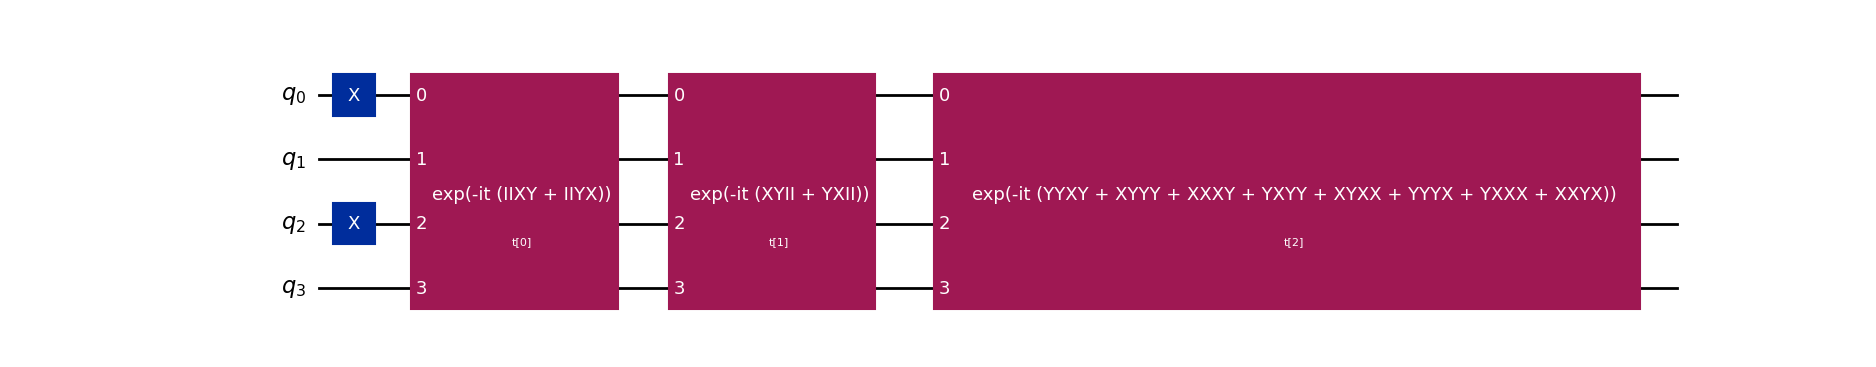

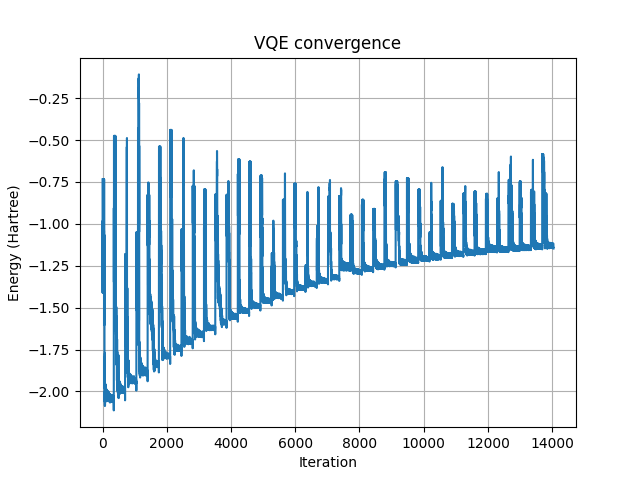

In [21]:
ansatz.decompose().draw("mpl")
plt.show()

plt.figure() 
plt.plot(energies_iter)
plt.xlabel("Iteration")
plt.ylabel("Energy (Hartree)")
plt.title("VQE convergence")
plt.grid(True)
plt.show()


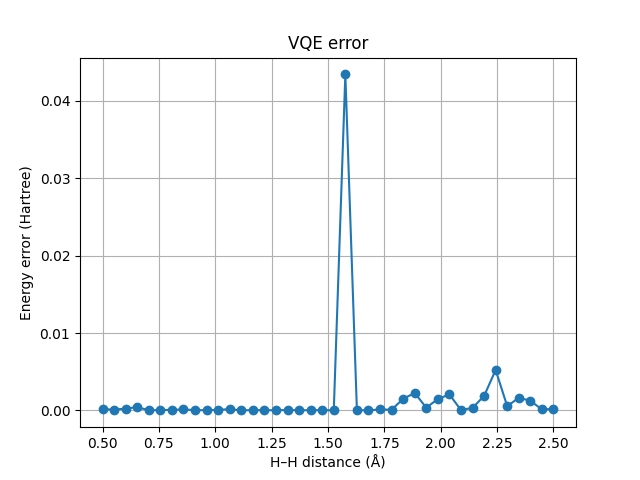

In [22]:
error = np.array(energies) - np.array(energies_class)
plt.figure() 

plt.plot(distances, error, "o-")
plt.xlabel("H–H distance (Å)")
plt.ylabel("Energy error (Hartree)")
plt.title("VQE error")
plt.grid(True)
plt.show()


#### 4.2.2. Application: Gate-Based Encryption

Quantum cryptography is a field that applies quantum mechanics to secure information exchange. Research in this area focuses on two main directions: first, the secure exchange of cryptographic keys, and second, the design of cryptographic algorithms. Within the framework of this module the cryptography algorithm based on quantum version of the one-time pad [16] protocol is demonstrated using Qiskit.

The Quantum One-Time Pad (QOTP) is a method for encrypting quantum information using a secret key. For each qubit $i \in [1,n]$, two random bits are chosen $a_i, b_i \in \{0,1\}$. These bits determine which quantum operations (Pauli gates) are applied to encrypt the qubit state: $X^{a_i} Z^{b_i}$ for $i$-th qubit. To decrypt, the same gates are applied in reverse order, $Z^{b_i} X^{a_i}$, which perfectly restores the original quantum state. This ensures that without knowledge of the secret key, the qubit’s information remains completely hidden. 

In [23]:
import random


# MESSAGE TO ENCRYPT ------------------------------
message = "QC"

# Convert text to binary
def text_to_binary(text):
    return ''.join(format(ord(c), '08b') for c in text)

def binary_to_text(binary):
    return ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary), 8))

binary = text_to_binary(message)
n = len(binary)
print("Original binary:", binary)


# INITIALIZE QUANTUM CIRCUIT ------------------------------
qc = QuantumCircuit(n, n)

# Encode classical bits into qubits
for i, bit in enumerate(binary):
    if bit == '1':
        qc.x(i)  # Encode '1' as |1>

# ------------------------------
# QUANTUM ONE-TIME PAD (QOTP) ENCRYPTION
# Random key for each qubit: apply X and/or Z
# ------------------------------
# Generate random keys (0 or 1) for X and Z gates
key_X = [random.randint(0,1) for _ in range(n)]
key_Z = [random.randint(0,1) for _ in range(n)]

# Apply encryption
for i in range(n):
    if key_X[i]:
        qc.x(i)
    if key_Z[i]:
        qc.z(i)

# DECRYPTION (apply same key) -----------------------------
for i in range(n):
    if key_Z[i]:
        qc.z(i)
    if key_X[i]:
        qc.x(i)

# MEASURE AND RECOVER MESSAGE ------------------------------
qc.measure(range(n), range(n))

simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()

# Binary result (may need reversing)
recovered_binary = list(counts.keys())[0][::-1]
recovered_message = binary_to_text(recovered_binary)

print("Encryption keys (X):", key_X)
print("Encryption keys (Z):", key_Z)

print("Recovered message:", recovered_message)

# Draw the final  quantum circuit
print(qc)

Original binary: 0101000101000011
Encryption keys (X): [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Encryption keys (Z): [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
Recovered message: QC
      ┌───┐┌───┐             ┌─┐                                             
 q_0: ┤ X ├┤ X ├─────────────┤M├─────────────────────────────────────────────
      ├───┤└───┘     ┌─┐     └╥┘                                             
 q_1: ┤ X ├──────────┤M├──────╫──────────────────────────────────────────────
      ├───┤┌───┐┌───┐└╥┘┌───┐ ║                               ┌─┐            
 q_2: ┤ X ├┤ Z ├┤ Z ├─╫─┤ X ├─╫───────────────────────────────┤M├────────────
      ├───┤├───┤├───┤ ║ ├───┤ ║ ┌───┐                         └╥┘      ┌─┐   
 q_3: ┤ X ├┤ X ├┤ Z ├─╫─┤ Z ├─╫─┤ X ├──────────────────────────╫───────┤M├───
      ├───┤├───┤└───┘ ║ └───┘ ║ └┬─┬┘                          ║       └╥┘   
 q_4: ┤ Z ├┤ Z ├──────╫───────╫──┤M├───────────────────────────╫────────╫────
      ├───┤├───┤      ║ 

In [24]:
# PHRASE ENCODING
#------------------------------------------------------------
message = "QC"

gate1 = "h"
gate2 = "x"
#------------------------------------------------------------

# Convert text to bits and back
def text_to_binary(text):
    return ''.join(format(ord(c), '08b') for c in text)

binary = text_to_binary(message)
print("Binary (classical bits):", binary)
n = len(binary)

qc = QuantumCircuit(n, n)

#-----------------------------------------------
# state = Statevector(qc) 
# rho_q0 = partial_trace(state, [0,1,3,4,5,6,7])
# print(rho_q0)
#-----------------------------------------------
# Encode classical bits into qubits
for i, bit in enumerate(binary):
    if bit == '1':
        qc.x(i)

# ENCRYPTION (key: X + H)
for i in range(n):
    getattr(qc, gate1)(i)
    getattr(qc, gate2)(i)


Binary (classical bits): 0101000101000011


Decrypted message: QC


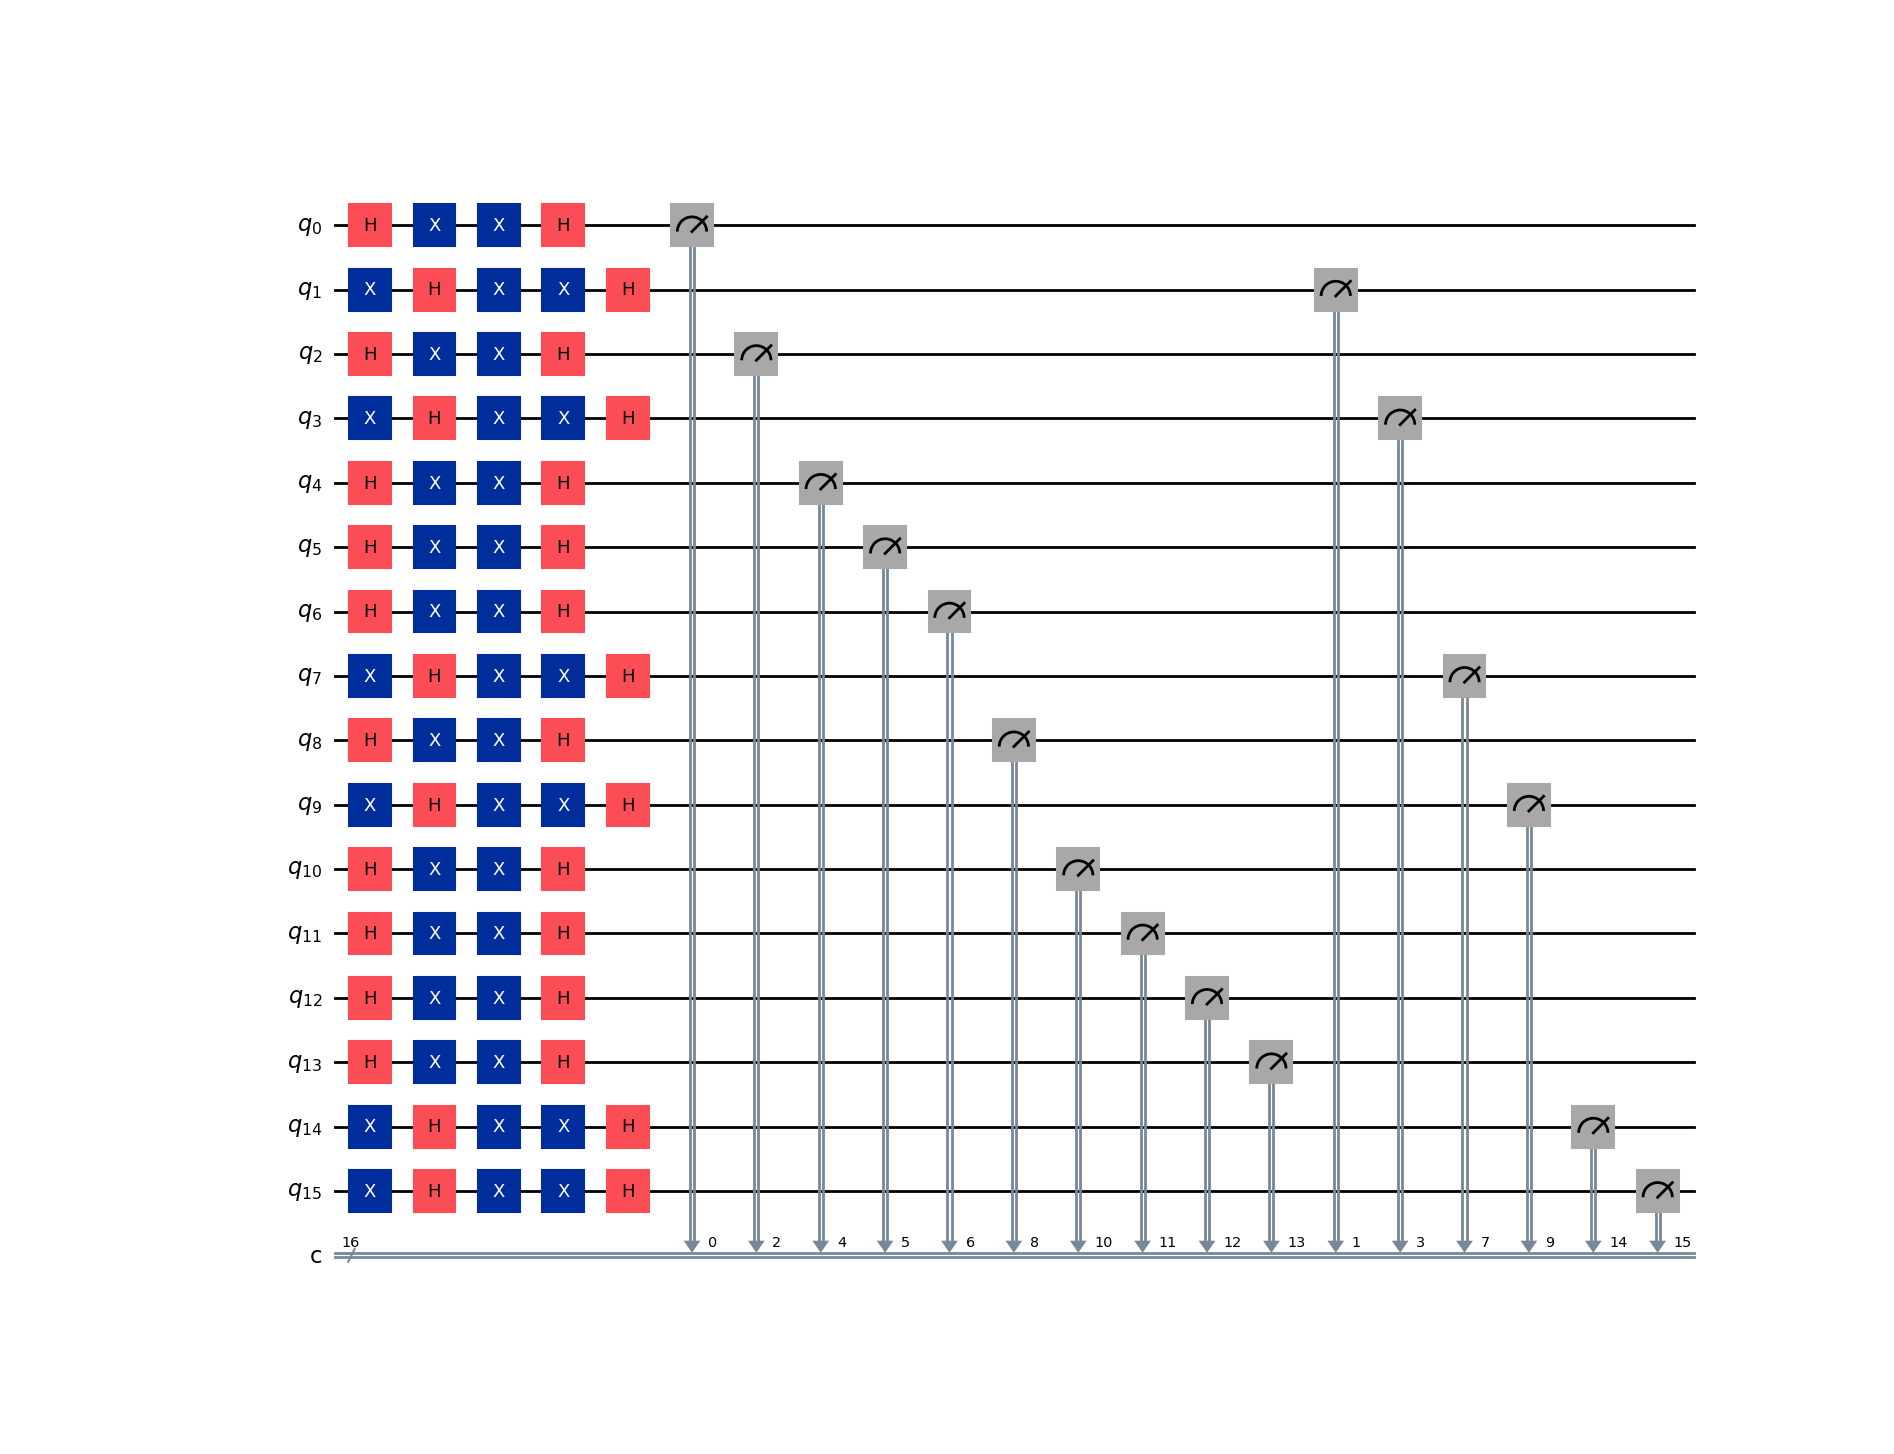

In [25]:
def binary_to_text(binary):
    return ''.join(
        chr(int(binary[i:i+8], 2)) for i in range(0, len(binary), 8)
    )

nq = qc.num_qubits
# DECRYPTION (reverse order)
for i in range(n):
    getattr(qc, gate2)(i)
    getattr(qc, gate1)(i)

# Measure AFTER decryption
qc.measure(range(nq), range(nq))

# Run with AerSimulator
simulator = AerSimulator()
result = simulator.run(qc, shots=1).result()
counts = result.get_counts()

recovered_binary = list(counts.keys())[0][::-1]

qc.draw("mpl")

print("Decrypted message:", binary_to_text(recovered_binary))

- To send your encrypted message without quantum hardware, you must convert it to classical bits by applying a measurement, which destroys the quantum state and the encryption. You lose the information permanently.
---
- In a classical simulator, the number of amplitudes grows as $2^N$ ($N$ is number of qubits),making it infeasible to print the full state vector for real messages. For example, the pharse "QM" requires → 16 qubits → resulting in $2^16$ = 65,536 amplitudes ! 

# Bibliography

1. M.A. Nielsen, I.L. Chuang,  Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge University Press, 2010.

2. R. Horodecki, P. Horodecki, M. Horodecki and K. Horodecki, Quantum entanglement. Rev. Mod. Phys. 81, 865, 2009. https://doi.org/10.1103/RevModPhys.81.865

3. Ruba Kharsa, Ahmed Bouridane, Abbes Amira. Advances in Quantum Machine Learning and Deep Learning for Image Classification: A Survey. Neurocomputing, 2023, V 560, 126843,  https://doi.org/10.1016/j.neucom.2023.126843

4. E. Grigoryan, S. Kumar, PR. Pinheiro.  A Review on Models and Applications of Quantum Computing. Quantum Reports. 2025, 7(3):39. https://doi.org/10.3390/quantum7030039

5. John F. Kam, Haiyue Kang, Gary J. Mooney and Lloyd C.L. Hollenberg. Teleporting two-qubit entanglement across 19 qubits on a superconducting quantum computer. Phys. Rev. Applied 23, 014057, 2025, https://doi.org/10.1103/PhysRevApplied.23.014057

6. D. Peral-García, J. Cruz-Benito, F. José García-Peñalvo, Systematic literature review: Quantum machine learning and its applications. Computer Science Review, V.51, 2024, 100619. https://doi.org/10.1016/j.cosrev.2024.100619

7. F. Barrett-danes, F.Ahmad. Quantum computing and cybersecurity: a rigorous systematic review of emerging threats, post-quantum solutions, and research directions (2019–2024). Discov Appl Sci 7, 1083, 2025. https://doi.org/10.1007/s42452-025-07322-5

8. B. Bauer, S.Bravyi, M. Motta, G. Kin-Lic Chan. Quantum Algorithms for Quantum Chemistry and Quantum Materials Science. : Chem. Rev. 2020, 120, 12685−12717. https://doi.org/10.1021/acs.chemrev.9b00829

9. Ur Rasool R., Ahmad H. F., Rafique W., et al. Quantum Computing for Healthcare: A Review. Future Internet, 2023, 15(3), 94,  https://doi.org/10.3390/fi15030094

10. V.K. Bukkarayasamudram, P.C.S. Reddy,  K. Arun Kumar et al. Quantum computing revolution in healthcare: a systematic review of applications, issues and future directions. Artif Intell Rev 58, 389 (2025). https://doi.org/10.1007/s10462-025-11381-w

11. K. Dwivedi, M. Haghparast, & T. Mikkonen. Quantum software engineering and quantum software development lifecycle: a survey. Cluster Comput 27, 7127–7145 (2024). https://doi.org/10.1007/s10586-024-04362-1

12. Q.A Memon, M. Al Ahmad, M. Pecht,  Quantum Computing: Navigating the Future of Computation, Challenges, and Technological Breakthroughs. Quantum Reports. 2024, 6, 627-663. https://doi.org/10.3390/quantum6040039

13. Harshdeep Singh, Sonjoy Majumder, Sabyashachi Mishra. Benchmarking of different optimizers in the variational quantum algorithms for applications in quantum chemistry. J. Chem. Phys. 159, 044117 (2023). https://doi.org/10.1063/5.0161057

14. D.A. Fedorov, B. Peng, N. Govind,  et al. VQE method: a short survey and recent developments. Mater Theory 6, 2 (2022). https://doi.org/10.1186/s41313-021-00032-6

15. Qing, Maomin & Xie, Wei. (2023). Use VQE to calculate the ground energy of hydrogen molecules on IBM Quantum. 10.48550/arXiv.2305.06538. 

16. Chuanqi Xu, Jamie Sikora, and Jakub Szefer. Securing Quantum Computer Reset with One-Time Pads. In Proceedings of the 2025 Quantum Security and Privacy Workshop (QSec '25). Association for Computing Machinery, New York, NY, USA, 1–6, 2025. https://doi.org/10.1145/3733825.3765278

https://www.quandela.com/resources/quantum-computing-glossary/

https://thequantumlaend.de/quantum-algorithms-quantum-circuits/


### Appendix 1

Demonstration of ordre qubit in quantum cuircit.

In [ ]:
from qiskit import QuantumCircuit, transpile

qc = QuantumCircuit(2, 2)

qc.x(0)                 # Flip qubit 0
qc.measure([0,1], [0,1])

sim = AerSimulator()
result = sim.run(transpile(qc, sim), shots=1024).result()

print(result.get_counts())

In [ ]:
qc = QuantumCircuit(2, 2)

qc.x(1)                 # Flip qubit 1
qc.measure([0,1], [0,1])

result = sim.run(transpile(qc, sim), shots=1024).result()

print(result.get_counts())

In [ ]:
from qiskit.quantum_info import Pauli

qc_e = QuantumCircuit(2)
state_0 = Statevector(qc_e)
qc_e.x(0)

qc_e.draw('mpl')

### Appendix 2

| Aspect                         | Classical Computers                          | Quantum Computers                                                             |
| ------------------------------ | -------------------------------------------- | ----------------------------------------------------------------------------- |
| **Basic unit of information**  | Bit (0 or 1)                                 | Qubit (0 and 1 simultaneously in superposition)                               |
| **Information representation** | Deterministic (single definite state)        | Probabilistic / quantum state  - a superposition of the quantum states <br> $ \|0\rangle\equiv \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $ \|1\rangle \equiv \begin{bmatrix} 0 \\ 1 \end{bmatrix} $ in a complex [Hilbert space](https://en.wikipedia.org/wiki/Hilbert_space)                                              |
| **Key physical principles**    | Classical physics                            | Quantum mechanics (superposition, entanglement, interference)                 |
| **Processing model**           | Sequential or parallel on classical hardware | Quantum parallelism across many possible states                               |
| **Memory scaling**             | Linear—adding bits increases memory linearly | Exponential—n qubits represent 2ⁿ states                                      |
| **Error sensitivity**          | Relatively low; stable hardware              | Very high; sensitive to noise, requires error correction                      |
| **Typical hardware**           | Transistors on silicon chips                 | Superconducting qubits, trapped ions, photonic qubits, etc.                   |
| **Best for**                   | General-purpose tasks, everyday computing    | Specialized algorithms: factoring (Shor), search (Grover), quantum simulation |
| **Maturity**                   | Fully developed and widely used              | Still experimental; early-stage practical systems                             |
| **Energy usage**               | Moderate; depends on system                  | Potentially very low for some models, but often requires cryogenic cooling    |
